<a href="https://colab.research.google.com/github/ls5340/CRH/blob/main/CRH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# accuracy

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

# Calculate accuracy score
accuracy = accuracy_score(y_true, y_pred)

print("Accuracy score:", accuracy)


Accuracy score: 0.5


# aga

In [ ]:
import math

def aga_rating(old_rating, k_factor, result, opponent_rating):
    """Calculate the new AGA rating for a player."""
    expected_score = 1 / (1 + math.pow(10, (opponent_rating - old_rating) / 400))
    new_rating = old_rating + k_factor * (result - expected_score)
    return new_rating

old_rating = 2000
k_factor = 16
result = 1
opponent_rating = 1900

new_rating = aga_rating(old_rating, k_factor, result, opponent_rating)

print(f"The new AGA rating is {new_rating}.")


The new AGA rating is 2005.7589600031538.


In [ ]:
# initialize ratings for each player
player_ratings = {
    'player1': 2000,
    'player2': 2200,
    'player3': 2400
}

# define the K-factor, which determines how much a player's rating will change after a game
K = 32

# define a function to calculate expected score
def expected_score(player_rating, opponent_rating):
    return 1 / (1 + 10**((opponent_rating - player_rating) / 400))

# define a function to update ratings based on game results
def update_ratings(player_ratings, player1, player2, result):
    # calculate expected scores for each player
    expected_score_player1 = expected_score(player_ratings[player1], player_ratings[player2])
    expected_score_player2 = expected_score(player_ratings[player2], player_ratings[player1])

    # update ratings based on game result
    if result == player1:
        player_ratings[player1] += K * (1 - expected_score_player1)
        player_ratings[player2] += K * (0 - expected_score_player2)
    elif result == player2:
        player_ratings[player1] += K * (0 - expected_score_player1)
        player_ratings[player2] += K * (1 - expected_score_player2)

# game 1: player 1 vs player 2 (player 1 wins)
update_ratings(player_ratings, 'player1', 'player2', 'player1')
update_ratings

# game 1: player 1 vs player 2 (player 1 wins)
update_ratings(player_ratings, 'player1', 'player2', 'player1')

# print rating of player 1 after game 1
print(f"Player 1 rating after game 1: {player_ratings['player1']}")
# print rating of player 2 after game 1
print(f"Player 2 rating after game 1: {player_ratings['player2']}")

# game 2: player 1 vs player 3 (player 1 loses)
update_ratings(player_ratings, 'player1', 'player3', 'player3')
update_ratings

# print rating of player 1 after game 2
print(f"Player 1 rating after game 2: {player_ratings['player1']}")
# print rating of player 3 after game 2
print(f"Player 3 rating after game 2: {player_ratings['player3']}")

# print new ratings for each player and the change from their original rating
for player in player_ratings:
    initial_rating = player_ratings[player] - (2000 if player == 'player1' else 2200 if player == 'player2' else 2400)
    print(f"{player}: {player_ratings[player] - initial_rating} to {player_ratings[player]} by {initial_rating}")


Player 1 rating after game 1: 2046.8730262652718
Player 2 rating after game 1: 2153.126973734728
Player 1 rating after game 2: 2043.1672412963871
Player 3 rating after game 2: 2403.7057849688845
player1: 2000.0 to 2043.1672412963871 by 43.16724129638715
player2: 2200.0 to 2153.126973734728 by -46.873026265272074
player3: 2400.0 to 2403.7057849688845 by 3.7057849688844726


# area

In [ ]:
def rectangle_area(length, width):
    """Calculate the area of a rectangle."""
    area = length * width
    return area

length = 5
width = 10

area = rectangle_area(length, width)

print(f"The area of the rectangle is {area}.")


The area of the rectangle is 50.


In [ ]:
def rectangle_area(length, width):
    """Calculate the area of a rectangle."""
    area = length * width
    return area

# Get the length and width of the rectangle from the user
length = float(input("Enter the length of the rectangle: "))
width = float(input("Enter the width of the rectangle: "))

# Calculate the area of the rectangle
area = rectangle_area(length, width)

# Display the area of the rectangle
print(f"The area of the rectangle is {area}.")


Enter the length of the rectangle: 1
Enter the width of the rectangle: 1
The area of the rectangle is 1.0.


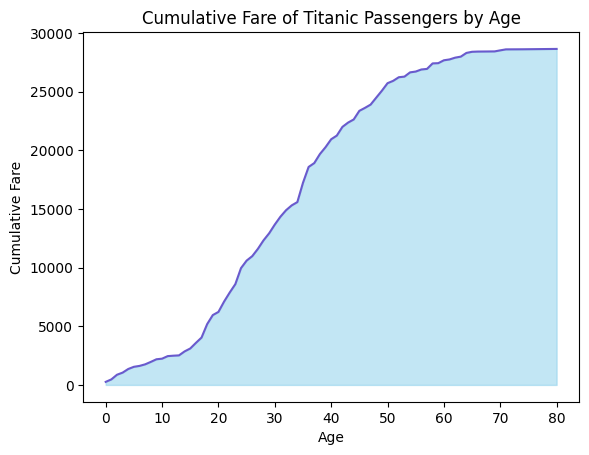

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Remove missing values in the 'Fare' and 'Age' columns
titanic.dropna(subset=['Fare', 'Age'], inplace=True)

# Convert the 'Age' column to integers
titanic['Age'] = titanic['Age'].astype(int)

# Group the data by age and calculate the cumulative sum of fares
fare_by_age = titanic.groupby('Age')['Fare'].sum().cumsum()

# Create a new dataframe with the cumulative sum of fares
df = pd.DataFrame({'Age': fare_by_age.index, 'Cumulative Fare': fare_by_age.values})

# Create the area plot
plt.fill_between(df['Age'], df['Cumulative Fare'], color='skyblue', alpha=0.5)
plt.plot(df['Age'], df['Cumulative Fare'], color='Slateblue')
plt.xlabel('Age')
plt.ylabel('Cumulative Fare')
plt.title('Cumulative Fare of Titanic Passengers by Age')
plt.show()


# auc

In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_scores = [0.8, 0.6, 0.3, 0.9, 0.2, 0.1]  # Predicted scores

auc = roc_auc_score(y_true, y_scores)
print("AUC score:", auc)


AUC score: 0.625


# bar plot

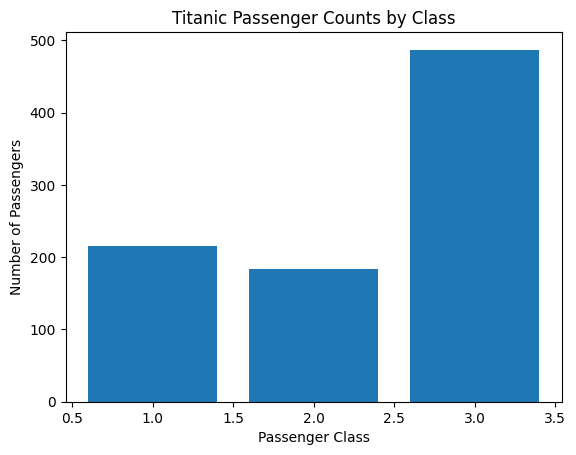

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Group the data by passenger class and count the occurrences
class_counts = titanic.groupby('Pclass')['Survived'].count()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Titanic Passenger Counts by Class')
plt.show()


# box plot

<Axes: xlabel='Pclass', ylabel='Age'>

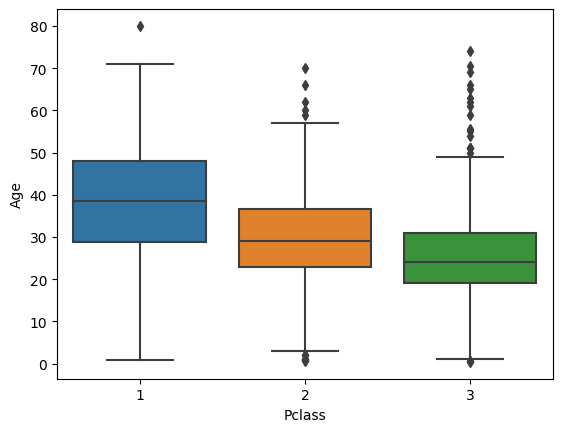

In [ ]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Create a box plot
sns.boxplot(x='Pclass', y='Age', data=titanic)


#calculation

In [ ]:
# 打印表头
print("九九乘法表")

# 打印表格
for i in range(1, 10):
    for j in range(1, 10):
        # 计算乘积并打印到控制台上
        product = i * j
        print(f"{i} x {j} = {product}\t", end="")
    # 打印换行符
    print()


九九乘法表
1 x 1 = 1	1 x 2 = 2	1 x 3 = 3	1 x 4 = 4	1 x 5 = 5	1 x 6 = 6	1 x 7 = 7	1 x 8 = 8	1 x 9 = 9	
2 x 1 = 2	2 x 2 = 4	2 x 3 = 6	2 x 4 = 8	2 x 5 = 10	2 x 6 = 12	2 x 7 = 14	2 x 8 = 16	2 x 9 = 18	
3 x 1 = 3	3 x 2 = 6	3 x 3 = 9	3 x 4 = 12	3 x 5 = 15	3 x 6 = 18	3 x 7 = 21	3 x 8 = 24	3 x 9 = 27	
4 x 1 = 4	4 x 2 = 8	4 x 3 = 12	4 x 4 = 16	4 x 5 = 20	4 x 6 = 24	4 x 7 = 28	4 x 8 = 32	4 x 9 = 36	
5 x 1 = 5	5 x 2 = 10	5 x 3 = 15	5 x 4 = 20	5 x 5 = 25	5 x 6 = 30	5 x 7 = 35	5 x 8 = 40	5 x 9 = 45	
6 x 1 = 6	6 x 2 = 12	6 x 3 = 18	6 x 4 = 24	6 x 5 = 30	6 x 6 = 36	6 x 7 = 42	6 x 8 = 48	6 x 9 = 54	
7 x 1 = 7	7 x 2 = 14	7 x 3 = 21	7 x 4 = 28	7 x 5 = 35	7 x 6 = 42	7 x 7 = 49	7 x 8 = 56	7 x 9 = 63	
8 x 1 = 8	8 x 2 = 16	8 x 3 = 24	8 x 4 = 32	8 x 5 = 40	8 x 6 = 48	8 x 7 = 56	8 x 8 = 64	8 x 9 = 72	
9 x 1 = 9	9 x 2 = 18	9 x 3 = 27	9 x 4 = 36	9 x 5 = 45	9 x 6 = 54	9 x 7 = 63	9 x 8 = 72	9 x 9 = 81	


In [ ]:
# 打印表头
print("九九乘法表（下三角）")

# 打印表格
for i in range(1, 10):
    for j in range(1, i+1):
        # 计算乘积并打印到控制台上
        product = i * j
        print(f"{i} x {j} = {product}\t", end="")
    # 打印换行符
    print()


九九乘法表（下三角）
1 x 1 = 1	
2 x 1 = 2	2 x 2 = 4	
3 x 1 = 3	3 x 2 = 6	3 x 3 = 9	
4 x 1 = 4	4 x 2 = 8	4 x 3 = 12	4 x 4 = 16	
5 x 1 = 5	5 x 2 = 10	5 x 3 = 15	5 x 4 = 20	5 x 5 = 25	
6 x 1 = 6	6 x 2 = 12	6 x 3 = 18	6 x 4 = 24	6 x 5 = 30	6 x 6 = 36	
7 x 1 = 7	7 x 2 = 14	7 x 3 = 21	7 x 4 = 28	7 x 5 = 35	7 x 6 = 42	7 x 7 = 49	
8 x 1 = 8	8 x 2 = 16	8 x 3 = 24	8 x 4 = 32	8 x 5 = 40	8 x 6 = 48	8 x 7 = 56	8 x 8 = 64	
9 x 1 = 9	9 x 2 = 18	9 x 3 = 27	9 x 4 = 36	9 x 5 = 45	9 x 6 = 54	9 x 7 = 63	9 x 8 = 72	9 x 9 = 81	


#capitalization

In [ ]:
def capitalization(s):
    # 如果字符串s为空，直接返回空字符串
    if not s:
        return ""
    # 否则将第一个字符转换为大写字母并返回
    return s[0].upper() + s[1:]

# 测试函数
print(capitalization("hello world"))  # 输出：Hello world
print(capitalization("python"))      # 输出：Python
print(capitalization(""))            # 输出：""


Hello world
Python



# chatbot

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def chatbot_response(user_input):
    # Convert input to lowercase and split into words
    words = user_input.lower().split()

    # Generate chatbot response
    response = "I'm sorry, I don't understand. Can you please rephrase your question?"

    for word in words:
        if word == "hi" or word == "hello":
            response = "Hi there! How can I help you today?"
            break

        if word == "bye" or word == "goodbye":
            response = "Goodbye! Have a great day."
            break

    return response

# Test the chatbot
while True:
    user_input = input("You: ")
    if user_input.lower() in ["stop", "quit"]:
        break
    response = chatbot_response(user_input)
    print("Chatbot:", response)


You: Hello
Chatbot: Hi there! How can I help you today?
You: Goodbye
Chatbot: Goodbye! Have a great day.
You: stop


In [5]:
adj = input("Adjective: ")
verb1 = input("Verb: ")
verb2 = input("Verb: ")
famous_person = input("Famous person: ")

madlib = f"Computer programming is so {adj}! It makes me so excited all the time because \
I love to {verb1}. Stay hydrated and {verb2} like you are {famous_person}!"

print(madlib)


Adjective: interesting
Verb: cook
Verb: happy
Famous person: Stephen
Computer programming is so interesting! It makes me so excited all the time because I love to cook. Stay hydrated and happy like you are Stephen!


# chatgpt

In [ ]:
!pip install tensorflow gpt-2-simple

  Preparing metadata (setup.py) ... done
  Created wheel for gpt-2-simple: filename=gpt_2_simple-0.8.1-py3-none-any.whl size=24558 sha256=3ec437a178ed474efffb82a509046c1d1790ee88068de154a727202a3da85872
  Stored in directory: /root/.cache/pip/wheels/df/6a/fe/10d3223f78d1ac3e4c83bb4c5e2d28dfb1789c2fb4cc7ea8d0
Successfully built gpt-2-simple


In [ ]:
import gpt_2_simple as gpt2

In [ ]:
gpt2.download_gpt2(model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 3.33Git/s]                                                     
Fetching encoder.json: 1.05Mit [00:00, 2.35Mit/s]
Fetching hparams.json: 1.05Mit [00:00, 913Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:12, 39.5Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 2.05Git/s]                                               
Fetching model.ckpt.meta: 1.05Mit [00:00, 3.49Mit/s]
Fetching vocab.bpe: 1.05Mit [00:00, 4.01Mit/s]


In [ ]:
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, model_name="124M")


Loading pretrained model models/124M/model.ckpt


In [ ]:
prompt = "Once upon a time, in a land far, far away, "
gen_text = gpt2.generate(sess, model_name="124M", prefix=prompt, length=200, return_as_list=True)[0]

print(gen_text)


Once upon a time, in a land far, far away,  you were born. It was a place of savagery, and the gentle breath of your birth gave you the weight of your existence. But knowing that your birth meant that you lived in the world, and that you could touch the world, you saw that you would have to live in the world.
You were born to die.
You say, "You're dead."
That's your answer.
You say, "I wish I could have died, I wish I could have died."
You think you can make them die.
You think you can.
You had to die more than once in your life.
What do you think of it?
I know it's silly, I know it's silly.
But it's not there.
I don't know.
Let me ask you an honest question.
What do you think about that?
This is what I think about.
But there's one thing I don't want to


# classification and regression trees (cart)

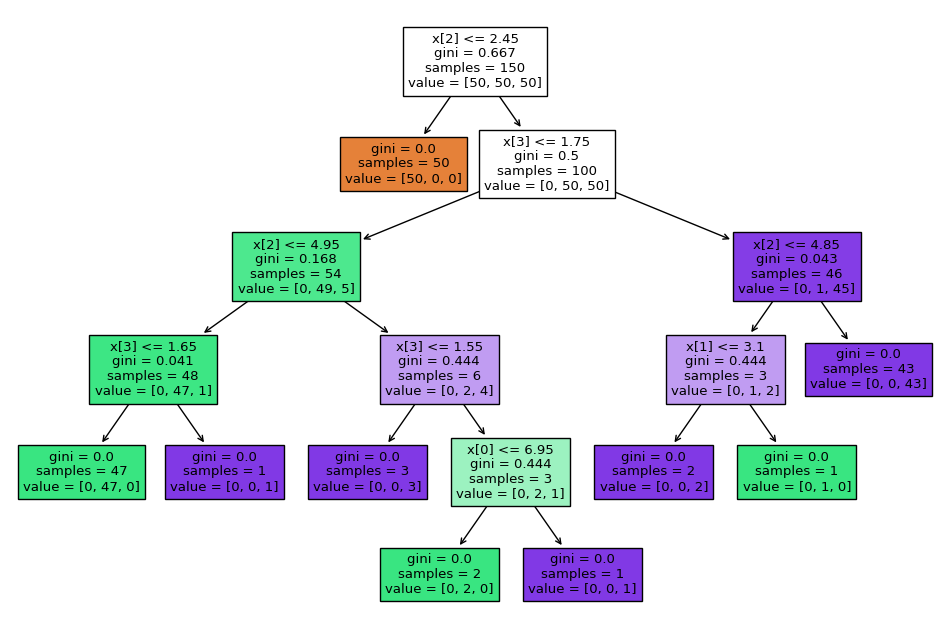

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(iris.data, iris.target)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()


In [ ]:
# gini index

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Load the iris dataset
iris = load_iris()

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(criterion='gini')

# Train the classifier using cross-validation
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.96 (+/- 0.07)


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training set
clf.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

# Generate a confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", matrix)


Accuracy score: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


#comparison

In [ ]:
a = 3
print(2<a<8)
print(a==a<2)


True
False


#composition

In [ ]:
def check_anagram(s1, s2):
    # 如果字符串长度不相等，直接返回False
    if len(s1) != len(s2):
        return False
    # 将两个字符串转换为排序后的列表
    s1_list = sorted(list(s1))
    s2_list = sorted(list(s2))
    # 检查两个列表是否相等
    return s1_list == s2_list

# 测试程序
print(check_anagram("listen", "silent"))   # 输出：True
print(check_anagram("triangle", "integral"))  # 输出：True
print(check_anagram("abc", "def"))        # 输出：False


True
True
False


# condition

In [ ]:
subs = 2400
likes = 200
comment = 56

if subs > 150 and likes > 150 and comment > 50:
  print('Awesome video')


Awesome video


In [ ]:
subs = 2400
likes = 200
comment = 56

conditions = [subs > 150, likes > 150, comment > 50]

if all(conditions):
  print ("Awesome video")


Awesome video


In [ ]:
subs = 2400
likes = 200
comment = 56

if subs > 150 or likes > 150 or comment > 50:
  print('Awesome video')


Awesome video


In [ ]:
subs = 2400
likes = 200
comment = 56

conditions = [subs > 150, likes > 150, comment > 50]

if any(conditions):
  print ("Awesome video")


Awesome video


In [3]:
import random

def play():
    user = input("What's your choice? 'r' for rock, 'p' for paper, 's' for scissors\n")
    computer = random.choice(['r', 'p', 's'])

    if user == computer:
        return 'It\'s a tie'

    # r > s, s > p, p > r
    if is_win(user, computer):
        return 'You won!'

    return 'You lost!'

def is_win(player, opponent):
    # return true if player wins
    # r > s, s > p, p > r
    if (player == 'r' and opponent == 's') or (player == 's' and opponent == 'p') \
        or (player == 'p' and opponent == 'r'):
        return True

print(play())


What's your choice? 'r' for rock, 'p' for paper, 's' for scissors
r
You won!


# confusion matrix

<Axes: >

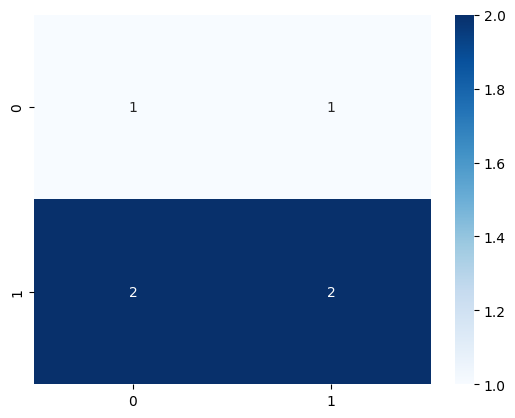

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')


#copy

In [ ]:
def copy_chars(char, n):
    # 如果n小于等于0，直接返回空字符串
    if n <= 0:
        return ""
    # 否则将字符复制n次，并将结果返回
    return char * n

# 测试函数
print(copy_chars("a", 5))   # 输出："aaaaa"
print(copy_chars("x", 0))   # 输出：""
print(copy_chars("A", 3))   # 输出："AAA"


aaaaa

AAA


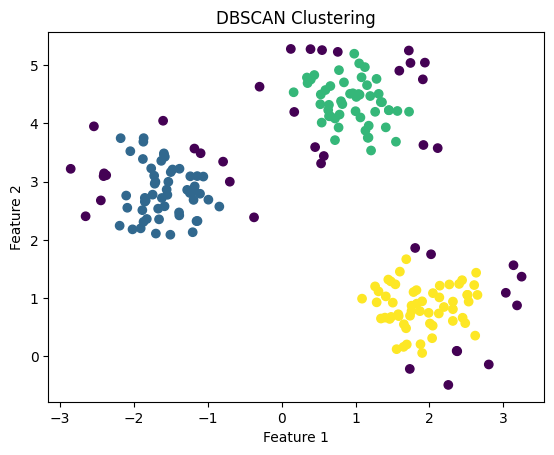

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=200, centers=3, cluster_std=0.5, random_state=0)

# Instantiate DBSCAN with parameters
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit and predict clusters
clusters = dbscan.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate sample data
X, y = make_blobs(n_samples=200, centers=3, cluster_std=0.5, random_state=0)

# Instantiate DBSCAN with parameters
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit and predict clusters
clusters = dbscan.fit_predict(X)

# Calculate Silhouette score
silhouette_avg = silhouette_score(X, clusters)
print("The average Silhouette score is :", silhouette_avg)


The average Silhouette score is : 0.4848887739896193


# correlation

In [ ]:
import numpy as np
from scipy.stats import pearsonr, ttest_ind

# generate two random variables
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

# assuming that there is no real correlation between x and y, calculate the Pearson correlation coefficient and the p-value
corr, p_val = pearsonr(x, y)

# print the results
print("Pearson correlation coefficient:", corr)
print("p-value:", p_val)

# assuming that there is no real difference between the means of the two groups, perform a two-sample t-test to determine if the correlation is statistically significant
t_stat, p_val2 = ttest_ind(x, y)

# print the results
print("t-statistic:", t_stat)
print("p-value:", p_val2)


Pearson correlation coefficient: 0.07386369817672639
p-value: 0.4651768925159748
t-statistic: -0.641317895028767
p-value: 0.5220578199637871


In [ ]:
import numpy as np
from scipy.stats import pearsonr

# create two random variables
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)

# calculate Pearson correlation coefficient and p-value
corr, p_val = pearsonr(x, y)

# print the results
print("Pearson correlation coefficient:", corr)
print("p-value:", p_val)


Pearson correlation coefficient: 0.1120411012541167
p-value: 0.26707518116112144


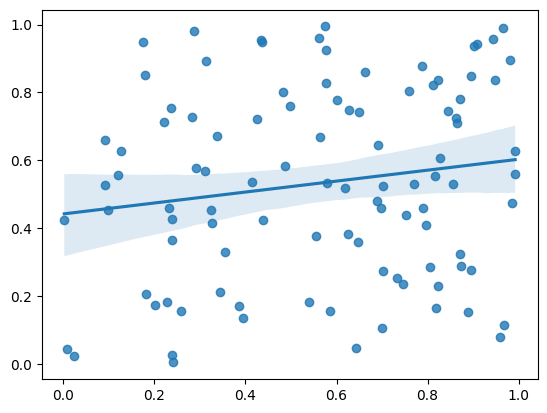

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generate two random arrays of data
x = np.random.rand(100)
y = np.random.rand(100)

# Create a scatter plot with regression line and correlation coefficient
sns.regplot(x=x, y=y)

# Display the plot
plt.show()


In [ ]:
import pandas as pd

# Sample data
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Score': [90, 85, 92, 78, 89],
        'Money': [1000, 1200, 800, 1500, 600]}

df = pd.DataFrame(data)

# Define a function to categorize the scores
def categorize_score(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    else:
        return 'Fail'

# Create a new column 'Grade' based on the 'Score' column
df['Grade'] = df['Score'].apply(categorize_score)

# Count occurrences of each category using value_counts()
category_counts = df['Grade'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Print the results
print(category_counts)

# Create a new column 'Grade' based on the 'Score' column
df['Grade'] = df['Score'].apply(categorize_score)

# Get unique categories
unique_categories = df['Grade'].unique()

# Initialize a dictionary to store counts
category_counts = {}

# Count the occurrences of each category using a for loop
for category in unique_categories:
    count = (df['Grade'] == category).sum()
    category_counts[category] = count

# Print the results
for category, count in category_counts.items():
    print(f"COUNTIF for {category}: {count}")


  Category  Count
0        A      2
1        B      2
2        C      1
COUNTIF for A: 2
COUNTIF for B: 2
COUNTIF for C: 1


# decapitalization

In [ ]:
def decapitalize(s):
    if len(s) == 0:
        return s
    else:
        return s[0].lower() + s[1:]

# 测试函数
s1 = "Hello, World!"
s2 = "PYTHON"
s3 = ""
print(decapitalize(s1))  # 输出："hello, World!"
print(decapitalize(s2))  # 输出："pYTHON"
print(decapitalize(s3))  # 输出：""


hello, World!
pYTHON



#dictionary

In [ ]:
# 定义一个字典
my_dict = {"apple": 1, "banana": 2, "orange": 3}

# 输入要查找的键
key = input("请输入要查找的键：")

# 查找键对应的值
value = my_dict.get(key)

# 输出结果
if value:
    print(f"{key} 对应的值为：{value}")
else:
    print(f"未找到键 {key}")


请输入要查找的键：apple
apple 对应的值为：1


#difference

In [ ]:
# 定义两个集合
set1 = {1, 2, 3, 4, 5}
set2 = {4, 5, 6, 7, 8}

# 计算两个集合的差异
diff_set = set1.difference(set2)

# 输出结果
print(f"集合 {set1} 与集合 {set2} 的差异为：{diff_set}")


集合 {1, 2, 3, 4, 5} 与集合 {4, 5, 6, 7, 8} 的差异为：{1, 2, 3}


# divide and conquer

In [ ]:
def find_max(arr):
    n = len(arr)

    # base case: if array has only one element, return that element
    if n == 1:
        return arr[0]

    # divide the array into two halves
    mid = n // 2
    left_arr = arr[:mid]
    right_arr = arr[mid:]

    # recursively find the maximum element in each half
    left_max = find_max(left_arr)
    right_max = find_max(right_arr)

    # return the maximum of the left and right halves
    return max(left_max, right_max)

# example usage
arr = [1, 4, 3, 8, 6, 9, 2]
print(find_max(arr)) # prints 9


9


#duplicate

In [ ]:
# 定义一个列表
my_list = [1, 2, 3, 3, 4, 5, 5, 6]

# 查找重复元素
dup_list = []

for elem in my_list:
    if my_list.count(elem) > 1 and elem not in dup_list:
        dup_list.append(elem)

# 输出结果
if len(dup_list) > 0:
    print(f"列表 {my_list} 中的重复元素为：{dup_list}")
else:
    print(f"列表 {my_list} 中没有重复元素")


列表 [1, 2, 3, 3, 4, 5, 5, 6] 中的重复元素为：[3, 5]


In [ ]:
a = [1,3,4,6,7,8,3,2,12,2,2,5,6,7,1,1,2,4]
print(a)
a = list(set(a))
print(a)

[1, 3, 4, 6, 7, 8, 3, 2, 12, 2, 2, 5, 6, 7, 1, 1, 2, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 12]


# export

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Do some operations on the data

# Export the data to a CSV file
df.to_csv('titanic_processed.csv', index=False)

#from google.colab import files

## Do some operation on a file
#with open('filename.txt', 'w') as f:
#    f.write('Hello, world!')

## Download the file to your local machine
#files.download('filename.txt')


# false positive rate

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

fpr = fp / (fp + tn)

print("False Positive Rate:", fpr)


False Positive Rate: 0.5


#fibonacci

In [ ]:
def fib(n):
    if n <= 0:  # 如果输入非正整数，返回空列表
        return []
    if n == 1:
        return [1]
    if n == 2:
        return [1, 1]
    fibs = [1, 1]
    for i in range(2, n):
        fibs.append(fibs[-1] + fibs[-2])
    return fibs

x = input('要几项（请输入正整数）：')
try:
    x = int(x)
    print(fib(x))
    print('斐波那契数列前{}项的和为{}'.format(x, sum(fib(x))))
except ValueError:
    print('请输入正整数！')


要几项（请输入正整数）：5
[1, 1, 2, 3, 5]
斐波那契数列前5项的和为12


#frequent

In [ ]:
from collections import Counter

def most_frequent(lst):
    count = Counter(lst)
    most_common = count.most_common(1)[0]
    max_count = most_common[1]
    most_common_num = most_common[0]
    positions = [i for i, num in enumerate(lst) if num == most_common_num]
    return most_common_num, max_count, positions

# 测试代码
lst = [1, 2, 3, 4, 5, 1, 2, 3, 1, 1]
most_common_num, max_count, positions = most_frequent(lst)
print(f"出现最多的数是 {most_common_num}，出现了 {max_count} 次，位置分别在 {positions}")


出现最多的数是 1，出现了 4 次，位置分别在 [0, 5, 8, 9]


In [ ]:
a = [1,3,4,6,7,8,3,2,12,2,2,5,6,7,1,1,2,4]
print(a)
most = max(set(a), key=a.count)
print(most)

[1, 3, 4, 6, 7, 8, 3, 2, 12, 2, 2, 5, 6, 7, 1, 1, 2, 4]
2


# f1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

# Calculate F1-score
f1 = f1_score(y_true, y_pred)

print("F1-score:", f1)


F1-score: 0.5714285714285715


# generative text

In [ ]:
!pip install tensorflow gpt-2-simple
import gpt_2_simple as gpt2
gpt2.download_gpt2(model_name="124M")
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 4.94Git/s]                                                     
Fetching encoder.json: 1.05Mit [00:00, 2.44Mit/s]
Fetching hparams.json: 1.05Mit [00:00, 3.14Git/s]                                                   
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:12, 39.5Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 3.38Git/s]                                               
Fetching model.ckpt.meta: 1.05Mit [00:00, 3.55Mit/s]
Fetching vocab.bpe: 1.05Mit [00:00, 3.48Mit/s]


Loading pretrained model models/124M/model.ckpt


In [ ]:
prompt = "Once upon a time, in a land far, far away, "
gen_text = gpt2.generate(sess, model_name="124M", prefix=prompt, length=200, return_as_list=True)[0]

print(gen_text)


Once upon a time, in a land far, far away,  field of the universe where no one, not even the facts of physics, can possibly live, there could be a god who could, and did, create the world upon which all life must depend.
Called the Earth, it is the place where we live, where we live, where we live, where we live, where we live, where we live, where we live, where we live, where we live.
And the God who created the earth and the universe, and threw it into the sea to wipe out the living creatures of it, and destroy it in its many ways, and send it back to its place of origin, and then create a new world, and then conquer it, and bring it back to life, to restore it to its original state, and then destroy it in its many ways, and bring it back to life, to restore it to its original state, to bring it back to life, to restore it to its original state, and then


# gradient boosted diecision tree (gbdt)

Accuracy: 0.956140350877193
AUC: 0.9950867998689813


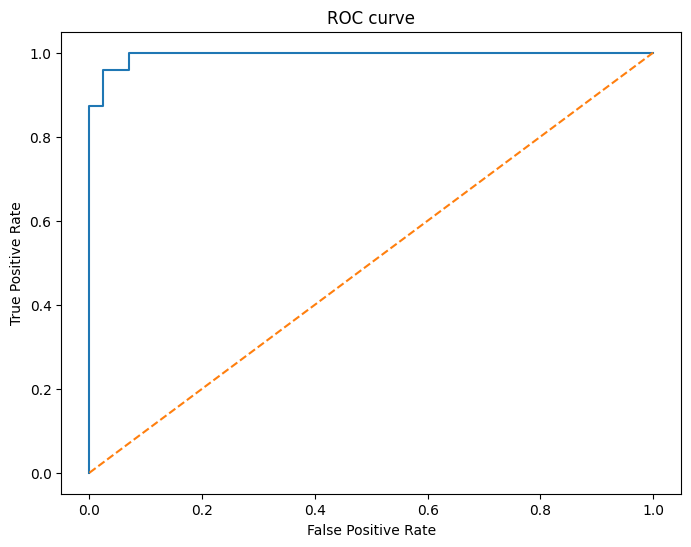

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier with default hyperparameters
clf = GradientBoostingClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = clf.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute the ROC AUC of the classifier
y_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print("AUC:", auc)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


#guess

In [ ]:
import random

# 生成答案
answer = random.randint(1, 100)

# 猜数游戏主循环
guess_count = 0
while True:
    guess = int(input("请输入您的猜测（1-100之间的整数）："))
    guess_count += 1

    if guess == answer:
        print(f"恭喜你，猜对了！你一共猜了{guess_count}次。")
        break
    elif guess < answer:
        print("你猜的数字太小了，请继续猜测。")
    else:
        print("你猜的数字太大了，请继续猜测。")


请输入您的猜测（1-100之间的整数）：55
你猜的数字太小了，请继续猜测。
请输入您的猜测（1-100之间的整数）：75
你猜的数字太小了，请继续猜测。
请输入您的猜测（1-100之间的整数）：95
你猜的数字太大了，请继续猜测。
请输入您的猜测（1-100之间的整数）：85
你猜的数字太小了，请继续猜测。
请输入您的猜测（1-100之间的整数）：90
你猜的数字太小了，请继续猜测。
请输入您的猜测（1-100之间的整数）：93
你猜的数字太小了，请继续猜测。
请输入您的猜测（1-100之间的整数）：94
恭喜你，猜对了！你一共猜了7次。


# heapsort

In [ ]:
def heapify(arr, n, i):
    # Find largest among root and children
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[i] < arr[l]:
        largest = l

    if r < n and arr[largest] < arr[r]:
        largest = r

    # If root is not largest, swap with largest and continue heapifying
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heapsort(arr):
    n = len(arr)

    # Build max heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

# Example usage
arr = [12, 11, 13, 5, 6, 7]
heapsort(arr)
print(arr)


[5, 6, 7, 11, 12, 13]


# heatmap

<Axes: xlabel='Pclass', ylabel='Sex'>

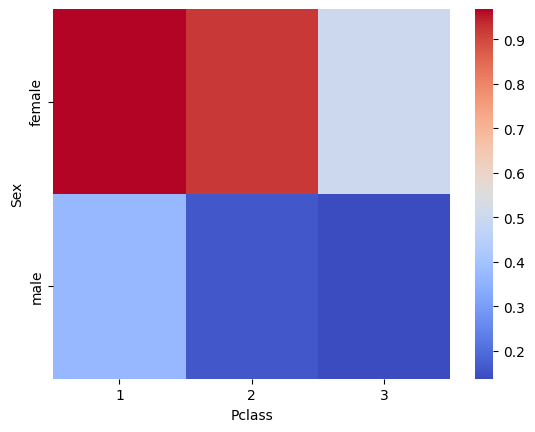

In [ ]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Create a pivot table
pivot_table = titanic.pivot_table(index='Sex', columns='Pclass', values='Survived')

# Create a heatmap
sns.heatmap(pivot_table, cmap='coolwarm')


# histogram

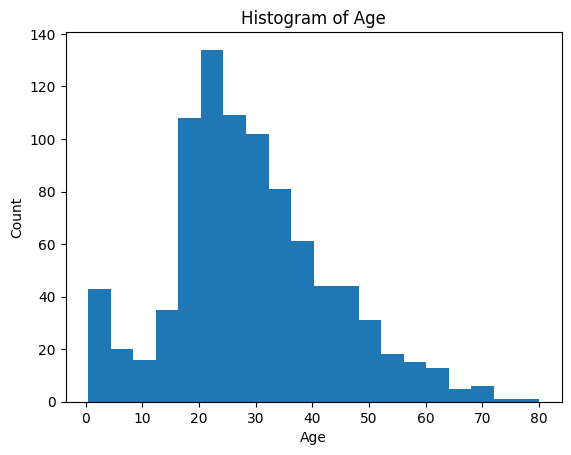

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Create a histogram plot
plt.hist(titanic['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()


# hit rate

In [ ]:
total_requests = 1000
successful_requests = 800
failed_requests = 200

hit_rate = successful_requests / total_requests

print(f"Hit rate: {hit_rate}")


Hit rate: 0.8


#if else

In [ ]:
def add(a,b):
  return a+b
def subtract(a,b):
  return a-b
a,b = 4,5
print((subtract(a,b) if a>b else add(a,b)))


9


# import

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print(df.head())

#import csv

#with open('filename.csv', newline='') as csvfile:
#    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
#    for row in reader:
#        # Do something with each row of data
#        print(row)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#isomap

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


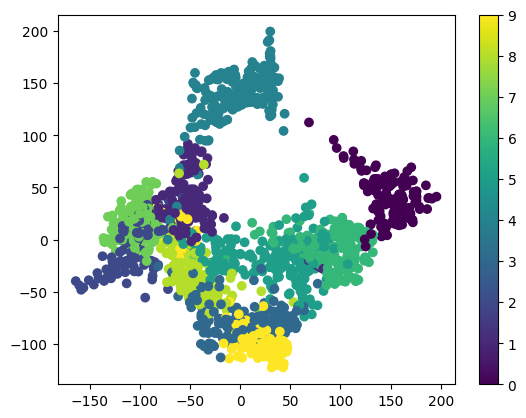

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Create an instance of the Isomap algorithm with n_components=2
isomap = Isomap(n_components=2)

# Fit the Isomap algorithm to the digits data
X_isomap = isomap.fit_transform(digits.data)

# Plot the results
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=digits.target)
plt.colorbar()
plt.show()


Accuracy: 0.9649122807017544
AUC: 0.9934490664919751


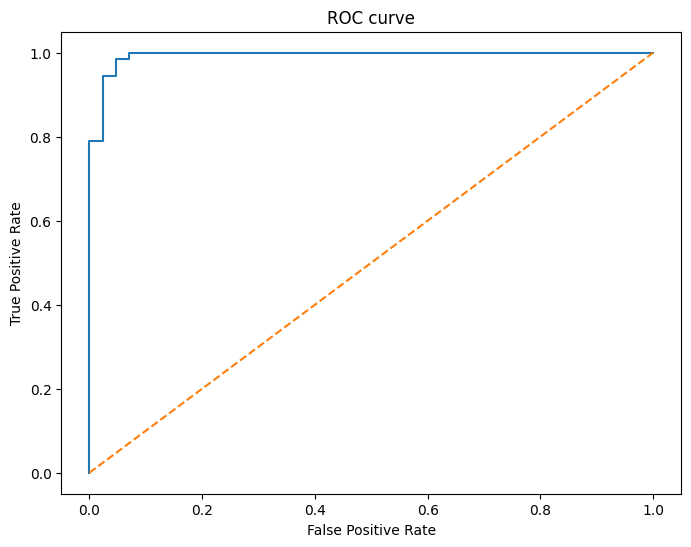

In [ ]:
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Initialize the LightGBM classifier with default hyperparameters
clf = lgb.LGBMClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred = clf.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute the ROC AUC of the classifier
y_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print("AUC:", auc)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


# line plot

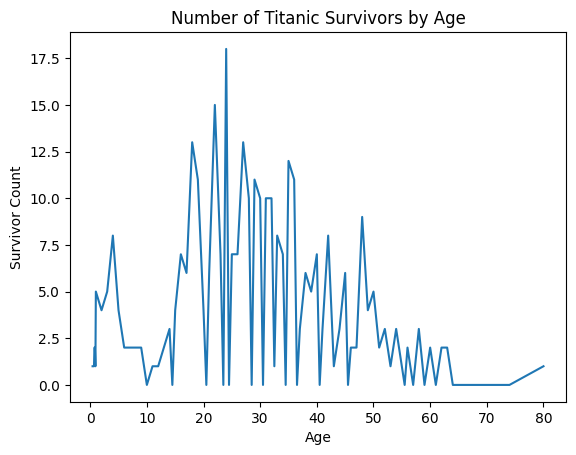

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Group the data by age and calculate the count of survivors for each age
age_counts = titanic.groupby('Age')['Survived'].sum()

# Create a line plot of the survivor counts for each age
plt.plot(age_counts.index, age_counts.values)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Survivor Count')
plt.title('Number of Titanic Survivors by Age')

# Show the plot
plt.show()


# linear programming

In [ ]:
!pip install pulp
from pulp import *

# Create the problem variable
problem = LpProblem("Cake Production", LpMaximize)

# Define the decision variables
x = LpVariable('x', lowBound=0, cat='Integer')  # Number of chocolate cakes
y = LpVariable('y', lowBound=0, cat='Integer')  # Number of vanilla cakes

# Define the objective function
problem += 5*x + 4*y, "Profit"

# Define the constraints
problem += 2*x + 3*y <= 10, "Flour"
problem += x + 2*y <= 8, "Sugar"
problem += 3*x + 2*y <= 15, "Eggs"

# Solve the problem
problem.solve()

# Print the status of the solution
print("Status:", LpStatus[problem.status])

# Print the optimal values of the decision variables
print("Optimal Solution:", value(5*x + 4*y))
print("Number of chocolate cakes (x) =", value(x))
print("Number of vanilla cakes (y) =", value(y))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 73.5 MB/s eta 0:00:00
Status: Optimal
Optimal Solution: 25.0
Number of chocolate cakes (x) = 5.0
Number of vanilla cakes (y) = 0.0


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
!pip install pulp
from pulp import *

# Create the problem variable
problem = LpProblem("Linear Programming", LpMaximize)

# Define the decision variables
x = LpVariable('x', lowBound=0, cat='Continuous')
y = LpVariable('y', lowBound=0, cat='Continuous')

# Define the objective function
problem += 2*x + y

# Define the constraints
problem += x + y >= 6
problem += x - y >= 4

# Solve the problem for maximum
problem.solve()
max_C = value(problem.objective)
max_x = value(x)
max_y = value(y)

# Change the objective to minimize
problem.sense = LpMinimize

# Solve the problem for minimum
problem.solve()
min_C = value(problem.objective)
min_x = value(x)
min_y = value(y)

# Print the results
print("Maximum:")
print("C =", max_C)
print("x =", max_x)
print("y =", max_y)
print()
print("Minimum:")
print("C =", min_C)
print("x =", min_x)
print("y =", min_y)


Maximum:
C = 0.0
x = 0.0
y = 0.0

Minimum:
C = 11.0
x = 5.0
y = 1.0


# locally linear embedding (lle)

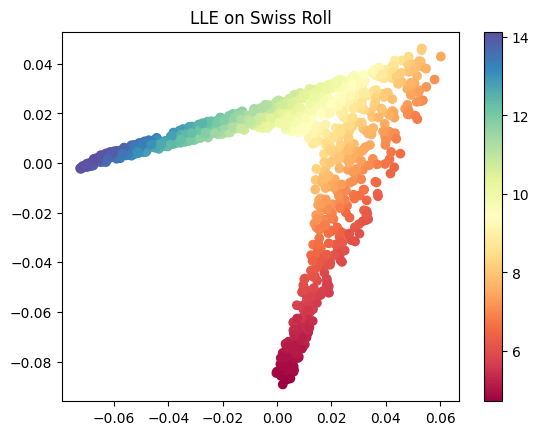

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Generate a Swiss roll dataset with 1000 samples and noise=0.2
X, color = make_swiss_roll(n_samples=1000, noise=0.2)

# Create an instance of the LLE algorithm with n_components=2
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

# Fit the LLE algorithm to the Swiss roll data
X_lle = lle.fit_transform(X)

# Plot the results
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.Spectral)
plt.colorbar()
plt.title("LLE on Swiss Roll")
plt.show()


# log loss

In [ ]:
from sklearn.metrics import log_loss

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

logloss = log_loss(y_true, y_pred)
print("Log Loss:", logloss)


Log Loss: 18.021826694558577


# love

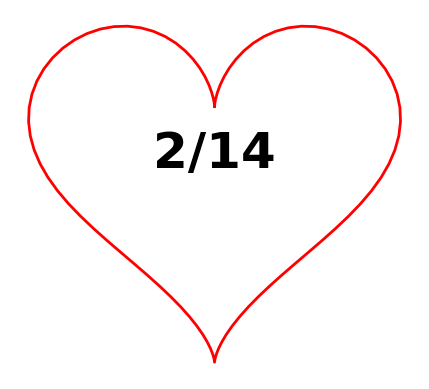

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
t = np.linspace(0, 2*np.pi, 100)
x = 16 * np.sin(t)**3
y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)

# 绘制图形
fig, ax = plt.subplots()
ax.plot(x, y, color='red', linewidth=2)
ax.set_aspect('equal')
ax.axis('off')

# 添加文字
ax.text(0, 1, '2/14', ha='center', va='center', fontsize=36, fontweight='bold')

plt.show()

# lstm

In [ ]:
# Import the required libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Define the input sequence
input_seq = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]])

# Define the output sequence
output_seq = np.array([[4], [5], [6], [7]])

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(50, input_shape=(3, 1)))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(input_seq.reshape(4, 3, 1), output_seq, epochs=100, batch_size=1, verbose=2)

# Make predictions on a new input sequence
new_seq = np.array([[5, 6, 7], [6, 7, 8], [7, 8, 9]])
print(model.predict(new_seq.reshape(3, 3, 1)))


Epoch 1/100
4/4 - 3s - loss: 28.7519 - 3s/epoch - 706ms/step
Epoch 2/100
4/4 - 0s - loss: 26.6068 - 30ms/epoch - 8ms/step
Epoch 3/100
4/4 - 0s - loss: 24.6437 - 28ms/epoch - 7ms/step
Epoch 4/100
4/4 - 0s - loss: 22.9207 - 31ms/epoch - 8ms/step
Epoch 5/100
4/4 - 0s - loss: 20.8871 - 39ms/epoch - 10ms/step
Epoch 6/100
4/4 - 0s - loss: 19.0509 - 36ms/epoch - 9ms/step
Epoch 7/100
4/4 - 0s - loss: 17.2603 - 36ms/epoch - 9ms/step
Epoch 8/100
4/4 - 0s - loss: 15.4857 - 29ms/epoch - 7ms/step
Epoch 9/100
4/4 - 0s - loss: 13.6005 - 23ms/epoch - 6ms/step
Epoch 10/100
4/4 - 0s - loss: 11.8527 - 46ms/epoch - 12ms/step
Epoch 11/100
4/4 - 0s - loss: 10.3566 - 25ms/epoch - 6ms/step
Epoch 12/100
4/4 - 0s - loss: 8.5537 - 32ms/epoch - 8ms/step
Epoch 13/100
4/4 - 0s - loss: 7.0899 - 30ms/epoch - 8ms/step
Epoch 14/100
4/4 - 0s - loss: 5.4537 - 34ms/epoch - 9ms/step
Epoch 15/100
4/4 - 0s - loss: 4.2043 - 25ms/epoch - 6ms/step
Epoch 16/100
4/4 - 0s - loss: 3.0384 - 23ms/epoch - 6ms/step
Epoch 17/100
4/4 - 0

# l2 loss

In [ ]:
import numpy as np

def l2_loss(y_true, y_pred):
    """Calculate the L2 loss between y_true and y_pred."""
    loss = np.mean(np.square(y_true - y_pred))
    return loss

y_true = np.array([1, 2, 3])
y_pred = np.array([2, 4, 6])

loss = l2_loss(y_true, y_pred)

print(f"The L2 loss is {loss}.")


The L2 loss is 4.666666666666667.


# map

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.graph_objects as go

fig = go.Figure(go.Choroplethmapbox(geojson=counties, locations=df.fips, z=df.unemp,
                                    colorscale="Viridis", zmin=0, zmax=12,
                                    marker_opacity=0.5, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


#match

In [ ]:
players = ["Player A", "Player B", "Player C"]  # 球员名单

for i in range(len(players)):
    for j in range(i+1, len(players)):
        print(players[i], "vs", players[j])


Player A vs Player B
Player A vs Player C
Player B vs Player C


In [ ]:
players = ["Player A", "Player B", "Player C", "Player D", "Player E"]

for i in range(len(players)):
    for j in range(i+1, len(players)):
        if (players[i] == "Player A" and players[j] == "Player B") or \
           (players[i] == "Player A" and players[j] == "Player C") or \
           (players[i] == "Player B" and players[j] == "Player C") or \
           (players[i] == "Player B" and players[j] == "Player E"):
            continue  # 遇到不允许比赛的情况，跳过本次循环
        print(players[i], "vs", players[j])


Player A vs Player D
Player A vs Player E
Player B vs Player D
Player C vs Player D
Player C vs Player E
Player D vs Player E


# matrix

In [ ]:
import numpy as np

A = np.array(['',1,2,3,4,5,6,1,0,1,2,0,0,0,2,0,0,1,6,0,0,
3,0,0,0,2,7,0,4,0,0,0,0,4,6,5,0,0,0,0,0,2,6,0,0,0,0,0,0]).reshape(7,7)
print(A)


[['' '1' '2' '3' '4' '5' '6']
 ['1' '0' '1' '2' '0' '0' '0']
 ['2' '0' '0' '1' '6' '0' '0']
 ['3' '0' '0' '0' '2' '7' '0']
 ['4' '0' '0' '0' '0' '4' '6']
 ['5' '0' '0' '0' '0' '0' '2']
 ['6' '0' '0' '0' '0' '0' '0']]


In [ ]:
import numpy as np

A = np.array(['',1,2,3,4,5,6,1,1,1,1,0,0,0,2,0,1,1,1,0,0,
3,0,0,1,1,1,0,4,0,0,0,1,1,1,5,0,0,0,0,1,1,6,0,0,0,0,0,1]).reshape(7,7)
print(A)

print("\n")
print(np.transpose(A))

print("\t")
print(A.T)


[['' '1' '2' '3' '4' '5' '6']
 ['1' '1' '1' '1' '0' '0' '0']
 ['2' '0' '1' '1' '1' '0' '0']
 ['3' '0' '0' '1' '1' '1' '0']
 ['4' '0' '0' '0' '1' '1' '1']
 ['5' '0' '0' '0' '0' '1' '1']
 ['6' '0' '0' '0' '0' '0' '1']]


[['' '1' '2' '3' '4' '5' '6']
 ['1' '1' '0' '0' '0' '0' '0']
 ['2' '1' '1' '0' '0' '0' '0']
 ['3' '1' '1' '1' '0' '0' '0']
 ['4' '0' '1' '1' '1' '0' '0']
 ['5' '0' '0' '1' '1' '1' '0']
 ['6' '0' '0' '0' '1' '1' '1']]
	
[['' '1' '2' '3' '4' '5' '6']
 ['1' '1' '0' '0' '0' '0' '0']
 ['2' '1' '1' '0' '0' '0' '0']
 ['3' '1' '1' '1' '0' '0' '0']
 ['4' '0' '1' '1' '1' '0' '0']
 ['5' '0' '0' '1' '1' '1' '0']
 ['6' '0' '0' '0' '1' '1' '1']]


In [ ]:
import pandas as pd
import numpy as np
A = pd.DataFrame(np.array(['',1,2,3,4,5,6,1,0,1,float("inf"),float("inf"),float("inf"),float("inf"),2,'',0,2,4,float("inf"),float("inf"),
              3,'','',0,4,9,float("inf"),4,'','','',0,8,10,5,'','','','',0,10,6,'','','','','',0]).reshape(7,7))

print(A)

print("\n")
print(np.transpose(A))

print("\t")
print(A.T)


   0  1  2    3    4    5    6
0     1  2    3    4    5    6
1  1  0  1  inf  inf  inf  inf
2  2     0    2    4  inf  inf
3  3          0    4    9  inf
4  4               0    8   10
5  5                    0   10
6  6                         0


   0    1    2    3   4   5  6
0       1    2    3   4   5  6
1  1    0                     
2  2    1    0                
3  3  inf    2    0           
4  4  inf    4    4   0       
5  5  inf  inf    9   8   0   
6  6  inf  inf  inf  10  10  0
	
   0    1    2    3   4   5  6
0       1    2    3   4   5  6
1  1    0                     
2  2    1    0                
3  3  inf    2    0           
4  4  inf    4    4   0       
5  5  inf  inf    9   8   0   
6  6  inf  inf  inf  10  10  0


In [ ]:
import pandas as pd
import numpy as np
A = pd.DataFrame(np.array(['',1,2,3,4,5,6,"Distance",0,1,float("inf"),float("inf"),float("inf"),float("inf"),"Completed",1,0,0,0,0,0,
              "Path",1,'?',"?", "?", "?", "?"]).reshape(4,7))

print(A)
print("\n")
A = pd.DataFrame(np.array(['',1,2,3,4,5,6,"Distance",0,1,2,4,float("inf"),float("inf"),"Completed",1,0,0,0,0,0,
              "Path",1,'?',"?", "?", "?", "?"]).reshape(4,7))

print(A)
print("\n")
A = pd.DataFrame(np.array(['',1,2,3,4,5,6,"Distance",0,1,2,4,9,float("inf"),"Completed",1,1,1,0,0,0,
              "Path",1,1,1,3, "?", "?"]).reshape(4,7))

print(A)
print("\n")
A = pd.DataFrame(np.array(['',1,2,3,4,5,6,"Distance",0,1,2,4,8,10,"Completed",1,1,1,1,1,1,
              "Path",1,1,1,3,4,5]).reshape(4,7))

print(A)


           0  1  2    3    4    5    6
0             1  2    3    4    5    6
1   Distance  0  1  inf  inf  inf  inf
2  Completed  1  0    0    0    0    0
3       Path  1  ?    ?    ?    ?    ?


           0  1  2  3  4    5    6
0             1  2  3  4    5    6
1   Distance  0  1  2  4  inf  inf
2  Completed  1  0  0  0    0    0
3       Path  1  ?  ?  ?    ?    ?


           0  1  2  3  4  5    6
0             1  2  3  4  5    6
1   Distance  0  1  2  4  9  inf
2  Completed  1  1  1  0  0    0
3       Path  1  1  1  3  ?    ?


           0  1  2  3  4  5   6
0             1  2  3  4  5   6
1   Distance  0  1  2  4  8  10
2  Completed  1  1  1  1  1   1
3       Path  1  1  1  3  4   5


# max and min

In [ ]:
numbers = [6, 12, 14, 4, 29, 39, 31, 22]
largest = max(numbers)
print(largest)
smallest = min(numbers)
print(smallest)


39
4


# maximum bipartite matching

In [ ]:
!pip install networkx matplotlib

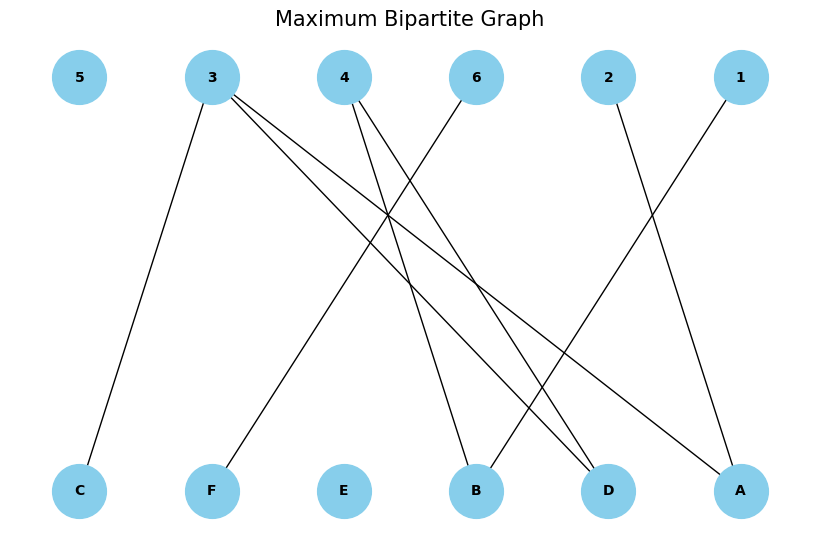

Maximum bipartite matching number considering direction is: 5


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# The given bipartite graph information
bpGraph = [
    [0, 1, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1]
]

# Create a NetworkX graph object
G = nx.Graph()

# Add nodes to the graph
applicants = ['A', 'B', 'C', 'D', 'E', 'F']
jobs = ['1', '2', '3', '4', '5', '6']
G.add_nodes_from(applicants, bipartite=0)  # Set 'bipartite' attribute to 0 for applicants
G.add_nodes_from(jobs, bipartite=1)        # Set 'bipartite' attribute to 1 for jobs

# Add edges to the graph based on the provided information
for i in range(len(bpGraph)):
    for j in range(len(bpGraph[i])):
        if bpGraph[i][j] == 1:
            G.add_edge(applicants[i], jobs[j])

# Create positions for nodes
pos = nx.bipartite_layout(G, applicants, align='horizontal')

# Draw the bipartite graph
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500, font_size=10, font_weight='bold')
plt.title("Maximum Bipartite Graph", fontsize=15)
plt.show()

# Add directed edges to the graph based on the provided information
for i in range(len(bpGraph)):
    for j in range(len(bpGraph[i])):
        if bpGraph[i][j] == 1:
            G.add_edge(applicants[i], jobs[j])

# Calculate maximum bipartite matching using Hopcroft-Karp algorithm
matching = nx.bipartite.hopcroft_karp_matching(G, top_nodes=applicants)

# Count the number of matched pairs
max_matching_number = len(matching) // 2

print("Maximum bipartite matching number considering direction is:", max_matching_number)


# mean absolute error (mae)

In [ ]:
from sklearn.metrics import mean_absolute_error

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.5


# mean squared error (mse)

In [ ]:
from sklearn.metrics import mean_squared_error

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5


#merge

In [ ]:
import pandas as pd

# 创建两个DataFrame对象
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'value1': [1, 2, 3, 4]})
df2 = pd.DataFrame({'key': ['B', 'D', 'E', 'F'], 'value2': [5, 6, 7, 8]})
print(df1)
print(df2)

print("\n")

# merge操作，使用key列作为连接键，inner join
merge_inner = pd.merge(df1, df2, on='key', how='inner')
print('Merge (inner join):')
print(merge_inner)

# join操作，使用key列作为连接键，outer join
join_outer = df1.join(df2.set_index('key'), on='key', how='outer', lsuffix='_left', rsuffix='_right')
print('Join (outer join):')
print(join_outer)

# left join
merge_left = pd.merge(df1, df2, on='key', how='left')
print('Merge (left join):')
print(merge_left)

# right join
merge_right = pd.merge(df1, df2, on='key', how='right')
print('Merge (right join):')
print(merge_right)

# full join
merge_full = pd.merge(df1, df2, on='key', how='outer')
print('Merge (full join):')
print(merge_full)

# semi join
merge_semi = pd.merge(df1, df2, on='key', how='inner', indicator=True)
semi_join = merge_semi[merge_semi['_merge'] == 'both'][['key', 'value1']]
print('Semi join:')
print(semi_join)

# anti join
merge_anti = pd.merge(df1, df2, on='key', how='outer', indicator=True)
anti_join = merge_anti[merge_anti['_merge'] == 'left_only'][['key', 'value1']]
print('Anti join:')
print(anti_join)


  key  value1
0   A       1
1   B       2
2   C       3
3   D       4
  key  value2
0   B       5
1   D       6
2   E       7
3   F       8


Merge (inner join):
  key  value1  value2
0   B       2       5
1   D       4       6
Join (outer join):
    key  value1  value2
0.0   A     1.0     NaN
1.0   B     2.0     5.0
2.0   C     3.0     NaN
3.0   D     4.0     6.0
NaN   E     NaN     7.0
NaN   F     NaN     8.0
Merge (left join):
  key  value1  value2
0   A       1     NaN
1   B       2     5.0
2   C       3     NaN
3   D       4     6.0
Merge (right join):
  key  value1  value2
0   B     2.0       5
1   D     4.0       6
2   E     NaN       7
3   F     NaN       8
Merge (full join):
  key  value1  value2
0   A     1.0     NaN
1   B     2.0     5.0
2   C     3.0     NaN
3   D     4.0     6.0
4   E     NaN     7.0
5   F     NaN     8.0
Semi join:
  key  value1
0   B       2
1   D       4
Anti join:
  key  value1
0   A     1.0
2   C     3.0


# merge sort

In [ ]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)

    return merge(left_half, right_half)

def merge(left_half, right_half):
    merged_arr = []
    i = j = 0

    while i < len(left_half) and j < len(right_half):
        if left_half[i] < right_half[j]:
            merged_arr.append(left_half[i])
            i += 1
        else:
            merged_arr.append(right_half[j])
            j += 1

    while i < len(left_half):
        merged_arr.append(left_half[i])
        i += 1

    while j < len(right_half):
        merged_arr.append(right_half[j])
        j += 1

    return merged_arr

# Example input
arr = [64, 25, 12, 22, 11]

# Call Merge Sort function
sorted_arr = merge_sort(arr)

# Print sorted result
print(sorted_arr)


#month week day

In [ ]:
days = int(input("请输入天数："))

# 计算月份
months = days // 30
days %= 30

# 计算周数
weeks = days // 7
days %= 7

print(f"{months}个月{weeks}周{days}天")


请输入天数：365
12个月0周5天


# mutate

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Add a new column based on existing columns
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family_Size  
0      0         A/5 21171   7.2500   NaN        S            2  
1      0          PC 17599  71.2833   C85        C            2  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  
3      0            113803  53.1000  C123        S      

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# define a custom function to apply to each row
def is_child(row):
    if row['Age'] < 18:
        return 'Child'
    else:
        return 'Adult'

# use apply() to create a new column based on the conditions of the 'Age' column
df['Status'] = df.apply(is_child, axis=1)

# print the updated DataFrame
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Status  
0      0         A/5 21171   7.2500   NaN        S  Adult  
1      0          PC 17599  71.2833   C85        C  Adult  
2      0  STON/O2. 3101282   7.9250   NaN        S  Adult  
3      0            113803  53.1000  C123        S  Adult  
4      0            

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# add a new column 'Status' based on the 'Age' column
df['Status'] = ['Child' if age < 18 else 'Adult' for age in df['Age']]

# print the updated DataFrame
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Status  
0      0         A/5 21171   7.2500   NaN        S  Adult  
1      0          PC 17599  71.2833   C85        C  Adult  
2      0  STON/O2. 3101282   7.9250   NaN        S  Adult  
3      0            113803  53.1000  C123        S  Adult  
4      0            

In [ ]:
import pandas as pd

# Load the Titanic dataset from a URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Define a lambda function to extract the first letter of the first name and assign a category based on its position in the alphabet
get_category = lambda name: ord(name[0].lower()) - 96

# Apply the lambda function to the 'Name' column and create a new 'Category' column
df['Category'] = df['Name'].apply(get_category)

# Print the updated DataFrame
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Category  
0      0         A/5 21171   7.2500   NaN        S         2  
1      0          PC 17599  71.2833   C85        C         3  
2      0  STON/O2. 3101282   7.9250   NaN        S         8  
3      0            113803  53.1000  C123        S         6  
4    

#narcissus number

In [ ]:
count = 0
for n in range(100,1000):
    i = n // 100 # 取百位数字
    j = n // 10 % 10 # 取十位数字
    k = n % 10 # 取个位数字
    s = i**3 + j**3 + k**3 # 计算立方和
    if n == s: # 判断是否为水仙花数
        print(n, end=" ") # 输出水仙花数
        count += 1 # 统计水仙花数的个数
print("\n1000以内的水仙花数共有", count, "个。")


153 370 371 407 
1000以内的水仙花数共有 4 个。


#  network analysis

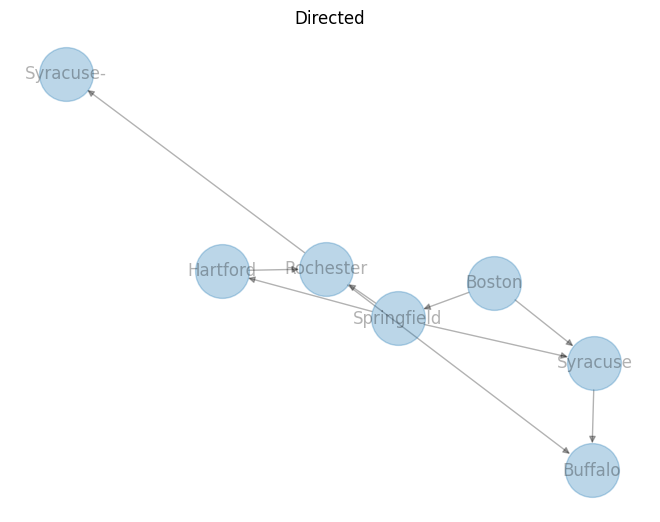

In [ ]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ------- DIRECTED

# Build a dataframe with your connections
# This time a pair can appear 2 times, in one side or in the other!
df = pd.DataFrame({ 'from':['Boston', 'Boston','Springfield', 'Springfield','Springfield','Rochester','Rochester','Syracuse','Hartford'],
                   'to':['Springfield', 'Syracuse', 'Rochester', 'Syracuse','Hartford','Syracuse-','Buffalo','Buffalo','Rochester']})

# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )

# Make the graph
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)
plt.title("Directed")
plt.show()


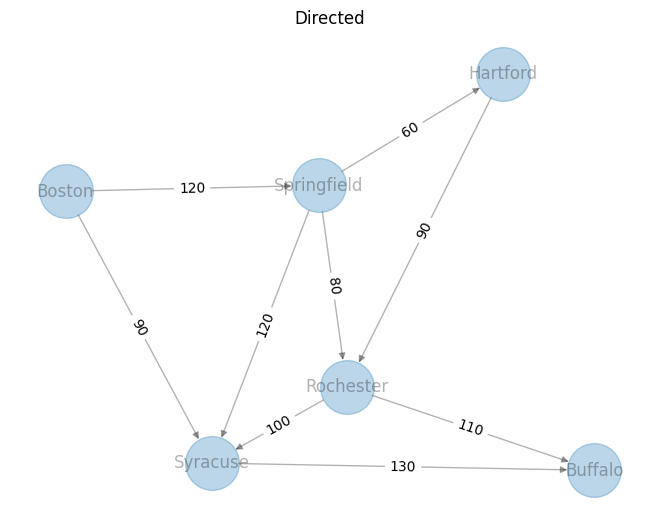

In [ ]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ------- DIRECTED

# Build a dataframe with your connections and weights
df = pd.DataFrame({ 'from':['Boston', 'Boston','Springfield', 'Springfield','Springfield','Rochester','Rochester','Syracuse','Hartford'],
                    'to':['Springfield', 'Syracuse', 'Rochester', 'Syracuse','Hartford','Syracuse','Buffalo','Buffalo','Rochester'],
                    'time':[120, 90, 80, 120, 60, 100, 110, 130, 90]})

# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', edge_attr='time', create_using=nx.DiGraph() )

# Make the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, alpha=0.3, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d['time'] for u,v,d in G.edges(data=True)})
plt.title("Directed")
plt.show()


In [ ]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:")
print(degree_centrality)
print()

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=False)
print("Betweenness Centrality:")
print(betweenness_centrality)
print()

# Closeness centrality
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:")
print(closeness_centrality)
print()

# PageRank
pagerank = nx.pagerank(G, alpha=0.85)
print("PageRank:")
print(pagerank)


Degree Centrality:
{'Boston': 0.4, 'Springfield': 0.8, 'Syracuse': 0.8, 'Rochester': 0.8, 'Hartford': 0.4, 'Buffalo': 0.4}

Betweenness Centrality:
{'Boston': 0.0, 'Springfield': 0.1, 'Syracuse': 0.07500000000000001, 'Rochester': 0.125, 'Hartford': 0.0, 'Buffalo': 0.0}

Closeness Centrality:
{'Boston': 0.0, 'Springfield': 0.2, 'Syracuse': 0.6400000000000001, 'Rochester': 0.44999999999999996, 'Hartford': 0.26666666666666666, 'Buffalo': 0.625}

PageRank:
{'Boston': 0.07166174546859871, 'Springfield': 0.1021176980769467, 'Syracuse': 0.2101447789301213, 'Rochester': 0.1861015178793586, 'Hartford': 0.10059517786923791, 'Buffalo': 0.3293790817757367}


In [ ]:
weighted_degree_centrality = nx.degree_centrality(G)
print("Weighted Degree Centrality:")
print(weighted_degree_centrality)


Weighted Degree Centrality:
{'Boston': 0.4, 'Springfield': 0.8, 'Syracuse': 0.8, 'Rochester': 0.8, 'Hartford': 0.4, 'Buffalo': 0.4}


In [ ]:
weighted_betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=False, weight='time')
print("Weighted Betweenness Centrality:")
print(weighted_betweenness_centrality)


Weighted Betweenness Centrality:
{'Boston': 0.0, 'Springfield': 0.1, 'Syracuse': 0.05, 'Rochester': 0.15000000000000002, 'Hartford': 0.0, 'Buffalo': 0.0}


In [ ]:
weighted_closeness_centrality = nx.closeness_centrality(G, distance='time')
print("Weighted Closeness Centrality:")
print(weighted_closeness_centrality)


Weighted Closeness Centrality:
{'Boston': 0.0, 'Springfield': 0.0016666666666666668, 'Syracuse': 0.0064, 'Rochester': 0.004864864864864865, 'Hartford': 0.0033333333333333335, 'Buffalo': 0.0058823529411764705}


In [ ]:
import pandas as pd
import networkx as nx

# Create graph
G = nx.DiGraph()

# Add edges
G.add_edges_from([
    ('Syracuse', 'Rochester', {'weight': 1}),
    ('Syracuse', 'Buffalo', {'weight': 2}),
    ('Rochester', 'Buffalo', {'weight': 3}),
    ('Rochester', 'Springfield', {'weight': 4}),
    ('Buffalo', 'Hartford', {'weight': 5}),
    ('Springfield', 'Syracuse', {'weight': 6})
])

# In-Degree Centrality
in_degree_centrality = nx.in_degree_centrality(G)
in_degree_centrality_df = pd.DataFrame(in_degree_centrality.items(), columns=['Node', 'Score'])
in_degree_centrality_df['Centrality Measure'] = 'In-Degree Centrality'

# Out-Degree Centrality
out_degree_centrality = nx.out_degree_centrality(G)
out_degree_centrality_df = pd.DataFrame(out_degree_centrality.items(), columns=['Node', 'Score'])
out_degree_centrality_df['Centrality Measure'] = 'Out-Degree Centrality'

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, endpoints=False)
betweenness_centrality_df = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Score'])
betweenness_centrality_df['Centrality Measure'] = 'Betweenness Centrality'

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality_df = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Score'])
closeness_centrality_df['Centrality Measure'] = 'Closeness Centrality'

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_centrality_df = pd.DataFrame(eigenvector_centrality.items(), columns=['Node', 'Score'])
eigenvector_centrality_df['Centrality Measure'] = 'Eigenvector Centrality'

# PageRank
pagerank = nx.pagerank(G, alpha=0.85)
pagerank_df = pd.DataFrame(pagerank.items(), columns=['Node', 'Score'])
pagerank_df['Centrality Measure'] = 'PageRank'

# Combine dataframes
df = pd.concat([
    in_degree_centrality_df,
    out_degree_centrality_df,
    betweenness_centrality_df,
    closeness_centrality_df,
    eigenvector_centrality_df,
    pagerank_df
], axis=0)

# Pivot table
pivot_df = df.pivot(index='Centrality Measure', columns='Node', values='Score')
pivot_df = pivot_df.reindex(columns=['Springfield', 'Syracuse', 'Rochester', 'Buffalo', 'Hartford'])

# Print results
print(pivot_df)


Node                    Springfield  Syracuse  Rochester   Buffalo  Hartford
Centrality Measure                                                          
Betweenness Centrality     0.083333  0.250000   0.083333  0.250000  0.000000
Closeness Centrality       0.333333  0.333333   0.333333  0.562500  0.500000
Eigenvector Centrality     0.301512  0.301512   0.301512  0.603024  0.603021
In-Degree Centrality       0.250000  0.250000   0.250000  0.500000  0.250000
Out-Degree Centrality      0.250000  0.500000   0.500000  0.250000  0.000000
PageRank                   0.143323  0.199787   0.134568  0.240195  0.282127


# normalized discounted cumulative gain

In [ ]:
import numpy as np

def ndcg_score(y_true, y_pred, k):
    """Compute the normalized discounted cumulative gain (NDCG) at rank k."""
    order = np.argsort(y_pred)[::-1]
    y_true = np.take(y_true, order[:k])

    # Compute ideal ranking
    ideal_order = np.argsort(y_true)[::-1]
    ideal_dcg = 0
    for i in range(len(ideal_order)):
        ideal_dcg += (2 ** y_true[ideal_order[i]] - 1) / np.log2(i + 2)

    # Compute actual ranking
    dcg = 0
    for i in range(len(y_true)):
        dcg += (2 ** y_true[i] - 1) / np.log2(i + 2)

    # Compute NDCG
    ndcg = dcg / ideal_dcg

    return ndcg

y_true = [3, 2, 3, 0, 1, 2]
y_pred = [2.5, 1, 2, 0, 0.5, 2]
k = 3

ndcg = ndcg_score(y_true, y_pred, k)

print(f"NDCG@{k}: {ndcg}")


NDCG@3: 0.9594535145926796


#operation

In [ ]:
print("数字基本运算")
a = 10
b = 20
c = 7
d = 25
print(a+b) #加法运算
#30
print(a-b) #减法运算
#-10
print(a*b) #乘法运算
#200
print(a/b) #浮点（除法）
#0.5
print(a%b) #余数（除法）
#10
print(d//c) #整数（除法）
#3
print(a**c) #幂运算
#10000000


数字基本运算
30
-10
200
0.5
10
3
10000000


In [ ]:
import operator
action = {
    "+":operator.add,
    "-":operator.sub,
    "*":operator.mul,
    "**":pow,
    "/":operator.truediv,
    "//":operator.floordiv,
}
print(action['+'](10,5))
print(action['-'](10,5))
print(action['*'](10,5))
print(action['**'](10,5))
print(action['/'](10,5))
print(action['//'](10,5))


15
5
50
100000
2.0
2


In [ ]:
print("自增减乘除法")
a = 100
print(a)
#100

a += 10
print(a)
#110

a -= 10
print(a)
#100

a *= 10
print(a)
#1000

a /= 10
print(a)
#100.0

a %= 3
print(a)
#1.0

a **= 10
print(a)
#1.0

a//=9
print(a)
#0.0


自增减乘除法
100
110
100
1000
100.0
1.0
1.0
0.0


# palindrome text

In [ ]:
def is_palindrome(num):
    # Convert number to string
    num_str = str(num)
    # Check if string is the same as its reverse
    return num_str == num_str[::-1]

# Example usage:
print(is_palindrome("elle")) # True
print(is_palindrome(12345)) # False


True
False


# picker wheel

In [9]:
import random

friends = [
    'Olek',
    'Carmela',
    'Laura',
    'Megan',
    'Keith',
    'Anna',
    'Skyler',
    'Amy',
    'Nadya'
]

# random.randint(1, 5) --> random number between 1 and 5
# random.choice(array) --> random item in this array

selected = random.choice(friends) # randomly choose a friend

print('Who should I facetime today?')
print(selected)


Who should I facetime today?
Amy


# pie chart

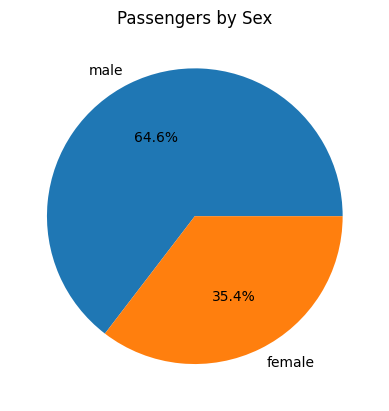

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Create a pie chart
sex_counts = titanic['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Passengers by Sex')
plt.show()


#permutation and combination

In [ ]:
for i in range(1,5):
  for j in range(1,5):
    for k in range(1,5):
      if (i!=k ) and (i!=j) and (j!=k):
        print(i,j,k)


1 2 3
1 2 4
1 3 2
1 3 4
1 4 2
1 4 3
2 1 3
2 1 4
2 3 1
2 3 4
2 4 1
2 4 3
3 1 2
3 1 4
3 2 1
3 2 4
3 4 1
3 4 2
4 1 2
4 1 3
4 2 1
4 2 3
4 3 1
4 3 2


# pivot

In [ ]:
# pivot longer

import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Pivot the data from wide to long format
melted_df = pd.melt(df, id_vars=['Name', 'Sex', 'Survived'], value_vars=['Pclass', 'Age'], var_name='Variable', value_name='Value')

print(melted_df.head())


                                                Name     Sex  Survived  \
0                            Braund, Mr. Owen Harris    male         0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female         1   
2                             Heikkinen, Miss. Laina  female         1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female         1   
4                           Allen, Mr. William Henry    male         0   

  Variable  Value  
0   Pclass    3.0  
1   Pclass    1.0  
2   Pclass    3.0  
3   Pclass    1.0  
4   Pclass    3.0  


In [ ]:
# pivot wider

import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Pivot the data from long to wide format
wide_df = df.pivot(index='Name', columns='Sex', values='Age')

print(wide_df.head())


Sex                                    female  male
Name                                               
Abbing, Mr. Anthony                       NaN  42.0
Abbott, Mr. Rossmore Edward               NaN  16.0
Abbott, Mrs. Stanton (Rosa Hunt)         35.0   NaN
Abelson, Mr. Samuel                       NaN  30.0
Abelson, Mrs. Samuel (Hannah Wizosky)    28.0   NaN


# precision

In [ ]:
from sklearn.metrics import precision_score

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

precision = precision_score(y_true, y_pred)
print("Precision:", precision)


Precision: 0.6666666666666666


#prime number

In [ ]:
# 导入 math 库中的 sqrt 函数
from math import sqrt

# 计数器，记录素数总数
h = 0

# 遍历 101~200 之间的每个数
for m in range(101, 201):
    # 对这个数开根并取整
    k = int(sqrt(m))

    # 遍历 2~这个数开根之后的数的范围
    for i in range(2, k+1):
        # 如果能被这个范围内的数整除，则不是素数，跳出循环
        if m % i == 0:
            leap = 0
            break
        else:
            leap = 1
    # 如果是素数，输出并计算总数
    if leap == 1:
        print("101-200之间的素数分别是:", m)
        h += 1

# 输出总数
print('101-200之间的素数总数是', h, '个')


101-200之间的素数分别是: 101
101-200之间的素数分别是: 103
101-200之间的素数分别是: 107
101-200之间的素数分别是: 109
101-200之间的素数分别是: 113
101-200之间的素数分别是: 127
101-200之间的素数分别是: 131
101-200之间的素数分别是: 137
101-200之间的素数分别是: 139
101-200之间的素数分别是: 149
101-200之间的素数分别是: 151
101-200之间的素数分别是: 157
101-200之间的素数分别是: 163
101-200之间的素数分别是: 167
101-200之间的素数分别是: 173
101-200之间的素数分别是: 179
101-200之间的素数分别是: 181
101-200之间的素数分别是: 191
101-200之间的素数分别是: 193
101-200之间的素数分别是: 197
101-200之间的素数分别是: 199
101-200之间的素数总数是 21 个


#prime factorization

In [ ]:
def prime_factorization(n):
    factors = []
    d = 2
    while n > 1:
        while n % d == 0:
            factors.append(d)
            n //= d
        d += 1
        if d*d > n:
            if n > 1: factors.append(n)
            break
    return factors

num = input("请输入一个正整数：")
if not num.isdigit() or int(num) <= 0:
    print("输入不合法，请输入一个正整数。")
else:
    num = int(num)
    factors = prime_factorization(num)
    if len(factors) == 1:
        print(f"{num}是素数，无法进行素因数分解。")
    else:
        factor_str = "*".join(str(f) for f in factors)
        print(f"对{num}进行分解素因数，{num}={factor_str}")


请输入一个正整数：365
对365进行分解素因数，365=5*73


#punctuation distribution

In [ ]:
hobbies = ["basketball","football","swimming"]
print("My hobbies are:" + ", ".join(hobbies))


My hobbies are:basketball, football, swimming


# radar chart

In [ ]:
import plotly.express as px
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.DataFrame(dict(r=[1,5,2,2,3],
            theta=['processing cost','mechanical properties','chemical stability',
            'thermal stability','device integration']))

fig = px.line_polar(df, r='r', theta='theta',
                    line_close=True) # Use line_close=True for closed lines,
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(r=[1,5,2,2,3],
            theta=['processing cost','mechanical properties','chemical stability',
            'thermal stability','device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True,) # template="plotly_dark"
# 更新雷达区域的边缘颜色，填充颜色
fig.update_traces(line_color='white',fill='toself',fillcolor = 'lightgreen')
fig.update_polars(angularaxis_showgrid=False,# 极坐标网格线是否显示
                  angularaxis_linecolor = 'white', #边框颜色
                  #angularaxis_color='green',顶点标签颜色
                  #radialaxis——showergrid=False,# 内部网格线是否显示
                  radialaxis_gridwidth=0, # 网格线宽度
                  radialaxis_griddash='dot', #网格线风格
                  radialaxis_gridcolor='white', #网格线颜色
                  radialaxis_linewidth=0, # 轴宽
                  radialaxis_linecolor='white', # 轴色
                  radialaxis_showticklabels=True, # 轴刻度显示
                  #radialaxis_showline = False, # 轴刻度显示
                  gridshape='linear', # 背景形状为多边形，默认是circular圆形
                  bgcolor="pink", # 背景色
)
fig.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
    r=[1,5,2,2,3],
    theta=['processing cost', 'mechanical properties', 'chemical stability', 'thermal stability',
          'device integration'],
    fill='tonext', fillcolor = 'lightgreen',))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True),),showlegend=False
)

fig.show()

# read

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# recall

In [ ]:
from sklearn.metrics import recall_score

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

recall = recall_score(y_true, y_pred)
print("Recall:", recall)


Recall: 0.5


In [ ]:
name = "lenny deces"[::-1]
print(name)


seced ynnel


# roc

In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

roc_auc = roc_auc_score(y_true, y_pred)
print("ROC AUC score:", roc_auc)


ROC AUC score: 0.5


# root mean square error (rmse)

In [ ]:
from sklearn.metrics import mean_squared_error

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.7071067811865476


# r squared

In [ ]:
from sklearn.metrics import mean_squared_error

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.7071067811865476


#salary

In [ ]:
#当月利润
month_lr = int(input('请输入当月净利润'))
#利润
lr_arr = [1000000,600000,400000,200000,100000,0]
#提成
tc_arr = [0.01,0.015,0.03,0.05,0.075,0.1]
#设发放奖金总数为0
jj_sum = 0
for index in range(0,6): #用index保存下标
  if month_lr > lr_arr[index]: #判断当月利润处于什么范围之内
    jj_sum += (month_lr - lr_arr[index]) * tc_arr[index]
    #奖金总数 = 总提成
    ticheng = (month_lr - lr_arr[index]) * tc_arr[index]
    #提成金额 = 利润 * 提成
    print('当月获得的提成为：',ticheng)
    month_lr = lr_arr[index]
print('当月应发放的奖金总数为：',jj_sum)


请输入当月净利润36500
当月获得的提成为： 3650.0
当月应发放的奖金总数为： 3650.0


# scatter plot

Text(0.5, 1.0, 'Scatter Plot of Fare vs. Age')

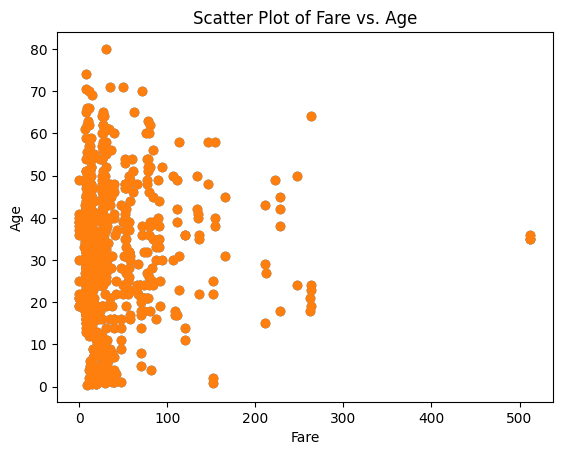

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

plt.scatter(x=titanic['Fare'], y=titanic['Age'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Scatter Plot of Fare vs. Age')

import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Create a scatter plot
plt.scatter(x=titanic['Fare'], y=titanic['Age'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Scatter Plot of Fare vs. Age')


# score

In [ ]:
for i in range(999):
    score = input("请输入分数(输入 q 退出)：")
    if score == 'q':
        break
    score = int(score)
    if 90 <= score <= 100:
        grade = "A"
    elif score >= 80:
        grade = "B"
    elif score >= 70:
        grade = "C"
    elif score >= 60:
        grade = "D"
    else:
        grade = "E"
    print("{}分属于{}等级".format(score,grade))


请输入分数(输入 q 退出)：55
55分属于E等级
请输入分数(输入 q 退出)：q


# search

In [ ]:
# breadth-first search
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            print(vertex)
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)

# Example usage
graph = {
    'A': {'B', 'C'},
    'B': {'A', 'D', 'E'},
    'C': {'A', 'F'},
    'D': {'B'},
    'E': {'B', 'F'},
    'F': {'C', 'E'}
}
bfs(graph, 'A')


A
B
C
E
D
F


In [ ]:
# depth-first search
def dfs(graph, start):
    visited = set()  # Set to keep track of visited nodes
    stack = [start]  # Stack to store nodes for traversal

    while stack:
        node = stack.pop()  # Get the next node from the stack

        if node not in visited:
            print(node)  # Process the node (print or do something else)
            visited.add(node)  # Mark the node as visited

            # Add the neighbors of the current node to the stack
            stack.extend(graph[node] - visited)

# Example usage:
graph = {
    'A': {'B', 'C'},
    'B': {'A', 'D', 'E'},
    'C': {'A', 'F'},
    'D': {'B'},
    'E': {'B', 'F'},
    'F': {'C', 'E'}
}

start_node = 'A'
dfs(graph, start_node)


A
C
F
E
B
D


In [ ]:
# binary search
def binary_search(arr, target):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

# Example usage
arr = [11, 12, 22, 25, 34, 64, 90]
target = 25
index = binary_search(arr, target)
print("Index of", target, ":", index)


Index of 25 : 3


In [ ]:
# linear search
def search(arr, N, x):
    for i in range(0, N):
        print(f"Comparison: arr[{i}] = {arr[i]} with x = {x}")
        if (arr[i] == x):
            return i
    return -1

# Driver Code
if __name__ == "__main__":
    arr = [2, 3, 4, 10, 40]
    x = 10
    N = len(arr)

    # Function call
    result = search(arr, N, x)
    if result == -1:
        print("Element is not present in array")
    else:
        print("Element is present at index", result)


Comparison: arr[0] = 2 with x = 10
Comparison: arr[1] = 3 with x = 10
Comparison: arr[2] = 4 with x = 10
Comparison: arr[3] = 10 with x = 10
Element is present at index 3


In [ ]:
# sentinel search
def sentinelSearch(arr, n, key):
    # Last element of the array
    last = arr[n - 1]

    # Element to be searched is placed at the last index
    arr[n - 1] = key
    i = 0

    while (arr[i] != key):
        print(f"Comparison: arr[{i}] = {arr[i]} with key = {key}")
        i += 1

    # Put the last element back
    arr[n - 1] = last

    if ((i < n - 1) or (arr[n - 1] == key)):
        print(key, "is present at index", i)
    else:
        print("Element Not found")

# Driver code
arr = [10, 20, 180, 30, 60, 50, 110, 100, 70]
n = len(arr)
key = 180

sentinelSearch(arr, n, key)


Comparison: arr[0] = 10 with key = 180
Comparison: arr[1] = 20 with key = 180
180 is present at index 2


In [ ]:
# Function to perform Ternary Search
def ternarySearch(l, r, key, ar):
    steps = []  # List to store comparison steps

    while r >= l:

        # Find mid1 and mid2
        mid1 = l + (r - l) // 3
        mid2 = r - (r - l) // 3

        # Add comparison steps to the list
        steps.append((l, mid1, mid2, r))

        # Check if key is at any mid
        if key == ar[mid1]:
            return mid1, steps
        if key == ar[mid2]:
            return mid2, steps

        # Since key is not present at mid,
        # Check in which region it is present
        # Then repeat the search operation in that region
        if key < ar[mid1]:
            # key lies between l and mid1
            r = mid1 - 1
        elif key > ar[mid2]:
            # key lies between mid2 and r
            l = mid2 + 1
        else:
            # key lies between mid1 and mid2
            l = mid1 + 1
            r = mid2 - 1

    # key not found
    return -1, steps

# Driver code

# Get the list
# Sort the list if not sorted
ar = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Starting index
l = 0

# end element index
r = 9

# Checking for 5
# Key to be searched in the list
key = 5

# Search the key using ternary search
result, comparisons = ternarySearch(l, r, key, ar)

# Print the result and comparison steps
print("Index of", key, "is", result)
print("Comparison Steps:")
for step in comparisons:
    print("Left:", step[0], "Mid1:", step[1], "Mid2:", step[2], "Right:", step[3])

print("\n")

# Checking for 50
# Key to be searched in the list
key = 50

# Search the key using ternary search
result, comparisons = ternarySearch(l, r, key, ar)

# Print the result and comparison steps
print("Index of", key, "is", result)
print("Comparison Steps:")
for step in comparisons:
    print("Left:", step[0], "Mid1:", step[1], "Mid2:", step[2], "Right:", step[3])


Index of 5 is 4
Comparison Steps:
Left: 0 Mid1: 3 Mid2: 6 Right: 9
Left: 4 Mid1: 4 Mid2: 5 Right: 5


Index of 50 is -1
Comparison Steps:
Left: 0 Mid1: 3 Mid2: 6 Right: 9
Left: 7 Mid1: 7 Mid2: 9 Right: 9


# sentimental analysis

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [ ]:
text_1 = "The book was a perfect balance between wrtiting style and plot."
text_2 =  "The pizza tastes terrible."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
print("Sentiment of text 1:", sent_1)
print("Sentiment of text 2:", sent_2)


Sentiment of text 1: {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5719}
Sentiment of text 2: {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}


#series

In [ ]:
def sum_of_arithmetic_series(start, end, step):
    """
    计算等差数列的和
    start: 等差数列的第一项
    end: 等差数列的最后一项
    step: 等差数列的公差
    """
    sum = 0
    for i in range(start, end + 1, step):
        sum += i
    return sum

start = int(input('请输入第一个整数：'))
end = int(input('请输入第二个整数：'))
step = int(input('请输入第三个整数：'))
sum = sum_of_arithmetic_series(start, end, step)
print(sum)


请输入第一个整数：1
请输入第二个整数：3
请输入第三个整数：5
1


In [ ]:
def sum_of_geometric_series(start, ratio, n):
    """
    计算等比数列的和
    start: 等比数列的第一项
    ratio: 等比数列的公比
    n: 等比数列的项数
    """
    return start * (1 - ratio**n) / (1 - ratio)
start = int(input('请输入第一个整数：'))
ratio = int(input('请输入第二个整数：'))
n = int(input('请输入第三个整数：'))
product = sum_of_geometric_series(start, ratio, n)
print(product)


请输入第一个整数：1
请输入第二个整数：3
请输入第三个整数：5
121.0


In [ ]:
import math

total = 0
for i in range(1, 11):
    factorial_i = math.factorial(i)
    total += factorial_i
    print(f"{i}! = {factorial_i}")

print(f"Sum of factorials from 1! to 10! is {total}")


1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
9! = 362880
10! = 3628800
Sum of factorials from 1! to 10! is 4037913


#shuffle

In [ ]:
from copy import deepcopy
from random import randint

def shuffle(list):
  temp_list = deepcopy(list)
  m = len(temp_list)
  while (m):
    m-=1
    i = randint(0,m)
    temp_list[m],temp_list[i] = temp_list[i],temp_list[m]
  print(temp_list)

pho = [1,2,3]
shuffle(pho)


[1, 2, 3]


# singular value decomposition (svd)

In [ ]:
import numpy as np

# Define a matrix A
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Perform reduced SVD on matrix A
U, S, V = np.linalg.svd(A, full_matrices=False)

# Reconstruct the original matrix A using the SVD components
A_reconstructed = np.dot(U, np.dot(np.diag(S), V))

# Print the original matrix and its reconstructed version
print("Original matrix A:\n", A)
print("\nReconstructed matrix A:\n", A_reconstructed)


Original matrix A:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Reconstructed matrix A:
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


#sort

In [ ]:
x = int(input('请输入第一个整数：'))
y = int(input('请输入第二个整数：'))
z = int(input('请输入第三个整数：'))

#将x与y进行比较
if x>y:
  x,y = y,x #交换x,y的值
#将x与z进行比较
if x>z:
  x,z = z,x #交换x,z的值
#将y与z进行比较
if y>z:
  y,z = z,y #交换y,z的值
print('三个数从小到大依次为：',x,y,z)


请输入第一个整数：1
请输入第二个整数：3
请输入第三个整数：5
三个数从小到大依次为： 1 3 5


In [ ]:
#bubble sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

# Example usage
arr = [64, 34, 25, 12, 22, 11, 90]
bubble_sort(arr)
print(arr)


[11, 12, 22, 25, 34, 64, 90]


In [ ]:
#insertion sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr
arr = [64, 34, 25, 12, 22, 11, 90]
print(insertion_sort(arr))


[11, 12, 22, 25, 34, 64, 90]


In [ ]:
#selection sort
def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr
arr = [64, 34, 25, 12, 22, 11, 90]
print(selection_sort(arr))


[11, 12, 22, 25, 34, 64, 90]


In [ ]:
#merge sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)

    return merge(left_half, right_half)


def merge(left, right):
    merged = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1

    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged
arr = [64, 34, 25, 12, 22, 11, 90]
print(merge_sort(arr))


[11, 12, 22, 25, 34, 64, 90]


In [ ]:
#heap sort
import heapq

def heapsort(arr):
    heapq.heapify(arr)
    sorted_arr = []
    while arr:
        sorted_arr.append(heapq.heappop(arr))
    return sorted_arr
# Example usage
arr = [64, 34, 25, 12, 22, 11, 90]
heapq = heapsort(arr)
print(heapq)


[11, 12, 22, 25, 34, 64, 90]


In [ ]:
#quick sort
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

# Example usage
arr = [64, 34, 25, 12, 22, 11, 90]
sorted_arr = quicksort(arr)
print(sorted_arr)


[11, 12, 22, 25, 34, 64, 90]


# spearman's rank correlation coefficient

In [ ]:
import numpy as np
from scipy.stats import spearmanr

# generate two random datasets
x = np.random.rand(50)
y = np.random.rand(50)

# calculate the Spearman rank correlation coefficient and the p-value
rho, pval = spearmanr(x, y)

# print the results
print("Spearman rank correlation coefficient: ", rho)
print("p-value: ", pval)


Spearman rank correlation coefficient:  0.02645858343337335
p-value:  0.8552764883233674


#statistics

In [ ]:
s = input("请输入一个字符串：")

letters = 0 #英文字母
space = 0 #空格
digit = 0 #数字
others = 0 #其他

for i in s:
  if i.isalpha(): #如果是字母
    letters += 1
  elif i.isspace(): #如果是空格
    space += 1
  elif i.isdigit(): #如果是数字
    digit += 1
  else:
    others += 1

print("该字符串中英文字母的个数为：",letters)
print("该字符串中空格字符的个数为：",space)
print("该字符串中数字的个数为：",digit)
print("该字符串中其它字符的个数为：",others)


请输入一个字符串：b2bc2c
该字符串中英文字母的个数为： 4
该字符串中空格字符的个数为： 0
该字符串中数字的个数为： 2
该字符串中其它字符的个数为： 0


#storage

In [ ]:
#byte
def byte_size(string):
  print(len(string.encode('utf-8')))

a = byte_size('4')
b = byte_size('Hello World')


1
11


In [ ]:
#variable
import sys
variable = 30
print(sys.getsizeof(variable))


28


In [ ]:
result = 0
for i in range(10):
  result += i
print(result)

result = 0
for i in range(0,5,2):
  result = result + i
print(result)


45
6


# string

In [ ]:
course = "Crp"
print(course.upper())
print(course.lower())
print(course.find('x'))
print(course.replace('rp','RP'))
print("rp" in course)


CRP
crp
-1
CRP
True


In [ ]:
alma_mater = "Stony Brook"
x=alma_mater.lower().split(" ")
print(x)


['stony', 'brook']


In [ ]:
numbers = [1,2,3,4,5]
numbers.insert(0,0)
print(numbers)


[0, 1, 2, 3, 4, 5]


In [ ]:
numbers = [1,2,3,4,5]
numbers.remove(3)
print(numbers)


[1, 2, 4, 5]


In [ ]:
numbers = [1,2,3,4,5]
numbers.clear()
print(numbers)


[]


In [ ]:
numbers = range(5)
for item in numbers:
  print(item)


0
1
2
3
4


In [ ]:
numbers = [0,1,2,3,4]
i=0
while i < len(numbers):
  print(numbers[i])
  i=i+1

0
1
2
3
4


In [ ]:
numbers = (1,2,2,3)
print(numbers.count(2))


2


In [ ]:
numbers = (1,2,2,3)
print(numbers.index(2))


1


# sumif

In [ ]:
import pandas as pd

# Sample data
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Score': [90, 85, 92, 78, 89],
        'Money': [1000, 1200, 800, 1500, 600]}

df = pd.DataFrame(data)

# Define a function to categorize the scores
def categorize_score(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    else:
        return 'Fail'

# Create a new column 'Grade' based on the 'Score' column
df['Grade'] = df['Score'].apply(categorize_score)

# Calculate the sum of money for each category
money_sum_by_category = df.groupby('Grade')['Money'].sum().reset_index()

print(df)
print(money_sum_by_category)

print("-"*10)

# Print the results
print("with for loop")
for _, row in money_sum_by_category.iterrows():
    category = row['Grade']
    money_sum = row['Money']
    print(f"Money sum by {category} is {money_sum}")

print("\n")

#   Filter the result for category 'ABC'
print("without for loop")
money_sum_A = money_sum_by_category[money_sum_by_category['Grade'] == 'A']['Money'].iloc[0]
money_sum_B = money_sum_by_category[money_sum_by_category['Grade'] == 'B']['Money'].iloc[0]
money_sum_C = money_sum_by_category[money_sum_by_category['Grade'] == 'C']['Money'].iloc[0]

# Print the result
print(f"Money sum by A is {money_sum_A}")
print(f"Money sum by B is {money_sum_B}")
print(f"Money sum by C is {money_sum_C}")


      Name  Score  Money Grade
0    Alice     90   1000     A
1      Bob     85   1200     B
2  Charlie     92    800     A
3    David     78   1500     C
4      Eve     89    600     B
  Grade  Money
0     A   1800
1     B   1800
2     C   1500
----------
with for loop
Money sum by A is 1800
Money sum by B is 1800
Money sum by C is 1500


without for loop
Money sum by A is 1800
Money sum by B is 1800
Money sum by C is 1500


#swap

In [ ]:
def swap(a,b):
  print(b,a)

a,b = -1,14
swap(a,b)


14 -1


In [ ]:
a = 10
b = 20
c= a
a= b
b= c
print(a,b)

20 10


#time

In [ ]:
import time

#获取当前时间
now = time.localtime()
#格式化当前时间
now_time = time.strftime('%Y-%m-%d %H:%M:%S',now)
#打印当前时间
print(now_time)

time.sleep(1) #暂停一秒

#隔一秒再次获取当前时间
now1 = time.localtime()
#格式化当前时间
now_time1 = time.strftime('%Y-%m-%d %H:%M:%S',now1)
#打印当前时间
print(now_time1)


2023-07-23 05:54:35
2023-07-23 05:54:36


In [ ]:
import time
start_time = time.time()
a=1
b=2
c=a+b

print(c)

end_time = time.time()
total_time = end_time - start_time
print("Time:", total_time)


3
Time: 0.0003535747528076172


# time series analysis

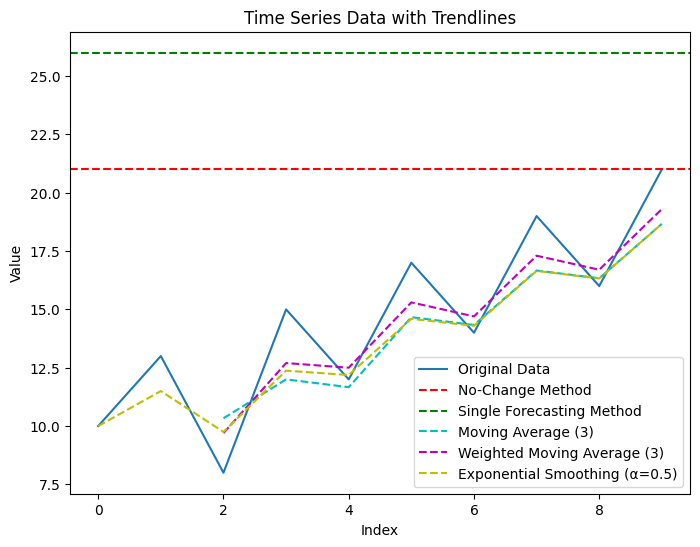

No-change method forecast: 21
Single forecasting method forecast: 26
Moving average method forecast: 18.666666666666668
Weighted moving average method forecast: 19.3
Exponential smoothing method forecast: 18.662109375


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load time series data into a DataFrame
data = pd.DataFrame({
    'value': [10, 13, 8, 15, 12, 17, 14, 19, 16, 21]
})

# Set the number of periods for the moving average and weighted moving average calculations
n = 3

# No-Change method
no_change_forecast = data['value'].iloc[-1]

# Single Forecasting method
single_forecast = data['value'].iloc[-1] + (data['value'].iloc[-1] - data['value'].iloc[-2])

# Moving Average
moving_avg_forecast = data['value'].rolling(window=n).mean().iloc[-1]

# Weighted Moving Average
weights = [0.1, 0.3, 0.6]
weighted_moving_avg_forecast = data['value'].rolling(window=n).apply(lambda x: (x * weights).sum()).iloc[-1]

# Exponential Smoothing
alpha = 0.5
exponential_smoothing_forecast = data['value'].ewm(alpha=alpha, adjust=False).mean().iloc[-1]

# Plot the original data and the trendlines
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data.index, data['value'], label='Original Data')
ax.axhline(y=no_change_forecast, color='r', linestyle='--', label='No-Change Method')
ax.axhline(y=single_forecast, color='g', linestyle='--', label='Single Forecasting Method')
ax.plot(data.index, data['value'].rolling(window=n).mean(), color='c', linestyle='--', label=f'Moving Average ({n})')
ax.plot(data.index, data['value'].rolling(window=n).apply(lambda x: (x * weights).sum()), color='m', linestyle='--', label=f'Weighted Moving Average ({n})')
ax.plot(data.index, data['value'].ewm(alpha=alpha, adjust=False).mean(), color='y', linestyle='--', label=f'Exponential Smoothing (α={alpha})')

ax.legend()
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Time Series Data with Trendlines')

plt.show()

# Print the forecasted values
print("No-change method forecast:", no_change_forecast)
print("Single forecasting method forecast:", single_forecast)
print("Moving average method forecast:", moving_avg_forecast)
print("Weighted moving average method forecast:", weighted_moving_avg_forecast)
print("Exponential smoothing method forecast:", exponential_smoothing_forecast)


# top-k accuracy

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

k = 2

y_pred_arr = np.array(y_pred)  # Convert to numpy array
sorted_indices = np.argsort(y_pred_arr, axis=-1)[-k:]  # Get indices of top-k predictions
top_k_predictions = np.zeros_like(y_pred_arr)
top_k_predictions[sorted_indices] = 1  # Create binary matrix for top-k predictions

top_k_acc = accuracy_score(y_true, top_k_predictions)
print("Top-{} Accuracy Score: {:.2f}".format(k, top_k_acc))


Top-2 Accuracy Score: 0.33


# translate

In [ ]:
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

translator = Translator()
text = "Hello, how are you?"
translated_text = translator.translate(text, src='en', dest='es')
print(translated_text.text)


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=83b83ef126200e4a391384a08e553442f0e2f0b9c68c9d49e327c18f3856f912
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling ch

¿Hola, cómo estás?


# traveling salesman

City Order: [0, 3, 11, 5, 1, 18, 7, 19, 17, 13, 8, 10, 2, 12, 9, 6, 4, 14, 16, 15]


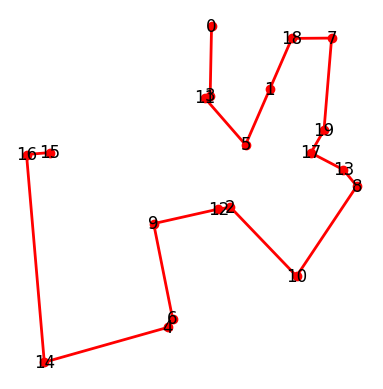

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据和路径
np.random.seed(0)
n = 20  # 城市数量
x = np.random.rand(n)
y = np.random.rand(n)
d = np.sqrt((x[:, np.newaxis] - x[np.newaxis, :])**2 + (y[:, np.newaxis] - y[np.newaxis, :])**2)
path = [0]
visited = set([0])
while len(path) < n:
    last = path[-1]
    dist = d[last, :]
    min_dist = np.inf
    next_city = -1
    for i in range(n):
        if i not in visited and dist[i] < min_dist:
            min_dist = dist[i]
            next_city = i
    if next_city != -1:
        path.append(next_city)
        visited.add(next_city)

# Print the exact order of cities
print("City Order:", path)

# 绘制路径图
fig, ax = plt.subplots()
ax.plot(x[path], y[path], 'o-', color='red', linewidth=2)
ax.set_aspect('equal')
ax.axis('off')
for i in range(n):
    ax.text(x[i], y[i], str(i), ha='center', va='center', fontsize=12)
plt.show()


In [ ]:
import itertools

# Define the distances between cities
distances = {
    'cityA': {'cityB': 10, 'cityC': 20, 'cityD': 30},
    'cityB': {'cityA': 10, 'cityC': 15, 'cityD': 25},
    'cityC': {'cityA': 20, 'cityB': 15, 'cityD': 10},
    'cityD': {'cityA': 30, 'cityB': 25, 'cityC': 10}
}

# Returns the total distance of a given path
def total_distance(path):
    distance = 0
    for i in range(len(path) - 1):
        distance += distances[path[i]][path[i + 1]]
    return distance

# Generates all possible paths and returns the shortest one
def traveling_salesperson(cities):
    shortest_path = None
    shortest_distance = float('inf')
    for path in itertools.permutations(cities):
        distance = total_distance(path)
        if distance < shortest_distance:
            shortest_distance = distance
            shortest_path = path
    return shortest_path

cities = list(distances.keys())
shortest_path = traveling_salesperson(cities)
print(shortest_path)


('cityA', 'cityB', 'cityC', 'cityD')


# true positive rate

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1]  # True labels
y_pred = [1, 1, 0, 1, 0, 0]  # Predicted labels

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

tpr = tp / (tp + fn)

print("True Positive Rate:", tpr)


True Positive Rate: 0.5


#try

In [ ]:
try:
  2*3
except TypeError:
  print("An exception was raised")
else:
  print("Thank God, no exceptions were raised.")


Thank God, no exceptions were raised.


#type

In [ ]:
a=10

b=str(a)
print("type of b is",type(b))

c=float(a)
print(c)

d="123"
print(d*5)

pai=3.14
pai=int(pai)
print(pai)


type of b is <class 'str'>
10.0
123123123123123
3


# violin plot

<Axes: xlabel='Pclass', ylabel='Age'>

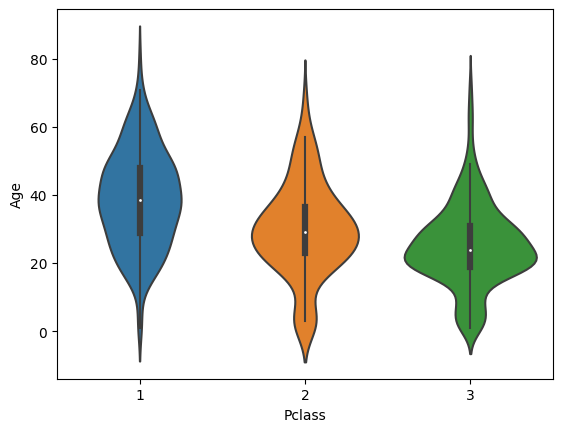

In [ ]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Create a violin plot of the age distribution by passenger class
sns.violinplot(x="Pclass", y="Age", data=titanic)


# vote

In [ ]:
# Step 1: Initialize the candidate dictionary
candidates = {}
num_voters = 0

# Step 2: Get the number of voters and candidate names from the user
num_voters = int(input("Enter the number of voters: "))
candidate_names = input("Enter the names of the candidates (separated by commas): ").split(',')

# Initialize the candidate dictionary with zero votes for each candidate
for candidate in candidate_names:
    candidates[candidate] = 0

# Step 3: Prompt each voter for their vote for each candidate
for i in range(num_voters):
    print(f"Voter {i+1}, please cast your vote for each candidate:")
    for candidate in candidate_names:
        preference = int(input(f"{candidate}: "))
        candidates[candidate] += preference

# Step 5: Calculate the sum of votes for each candidate
candidate_sums = {}
for candidate in candidate_names:
    candidate_sums[candidate] = candidates[candidate]

# Step 6: Find the candidate with the lowest sum of votes, and declare them as the winner
winner = max(candidate_sums, key=candidate_sums.get)
print(f"{winner} is the winner with a total vote sum of {candidate_sums[winner]}.")


Enter the number of voters: 2
Enter the names of the candidates (separated by commas): Liu,Yu
Voter 1, please cast your vote for each candidate:
Liu: 1
Yu: 2
Voter 2, please cast your vote for each candidate:
Liu: 3
Yu: 2
Liu is the winner with a total vote sum of 4.


In [ ]:
# Step 1: Initialize the candidate dictionary
candidates = {}
num_voters = 0

# Step 2: Get the number of voters and candidate names from the user
num_voters = int(input("Enter the number of voters: "))
candidate_names = input("Enter the names of the candidates (separated by commas): ").split(',')

# Initialize the candidate dictionary with zero votes for each candidate
for candidate in candidate_names:
    candidates[candidate] = 0

# Step 3: Prompt each voter for their vote for each candidate
for i in range(num_voters):
    print(f"Voter {i+1}, please cast your vote for each candidate:")
    for candidate in candidate_names:
        preference = int(input(f"{candidate}: "))
        candidates[candidate] += preference

# Step 5: Calculate the sum of votes for each candidate
candidate_sums = {}
for candidate in candidate_names:
    candidate_sums[candidate] = candidates[candidate]

# Step 6: Find the candidate with the lowest sum of votes, and declare them as the winner
winner = min(candidate_sums, key=candidate_sums.get)
print(f"{winner} is the winner with a total vote sum of {candidate_sums[winner]}.")


Enter the number of voters: 2
Enter the names of the candidates (separated by commas): Liu,Yu
Voter 1, please cast your vote for each candidate:
Liu: 1
Yu: 2
Voter 2, please cast your vote for each candidate:
Liu: 3
Yu: 2
Liu is the winner with a total vote sum of 4.


#vowel and consonant


In [ ]:
def count_vowels_consonants(s):
    # 定义元音字母和辅音字母集合
    vowels = set("aeiouAEIOU")
    consonants = set("bcdfghjklmnpqrstvwxyzBCDFGHJKLMNPQRSTVWXYZ")
    # 初始化计数器
    vowel_count = 0
    consonant_count = 0
    # 遍历字符串中的每个字符
    for char in s:
        # 如果是元音字母，将元音字母计数器加1
        if char in vowels:
            vowel_count += 1
        # 如果是辅音字母，将辅音字母计数器加1
        elif char in consonants:
            consonant_count += 1
    # 返回元音字母计数器和辅音字母计数器的值
    return vowel_count, consonant_count

# 测试函数
vowels, consonants = count_vowels_consonants("Hello, World!")
print("元音字母个数：", vowels)       # 输出："元音字母个数：3"
print("辅音字母个数：", consonants)   # 输出："辅音字母个数：7"


元音字母个数： 3
辅音字母个数： 7


# waffle chart

In [ ]:
#Conda - conda install pywaffle 或者 Pip-pip install pywaffle
!pip install pywaffle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 26.4 MB/s eta 0:00:00


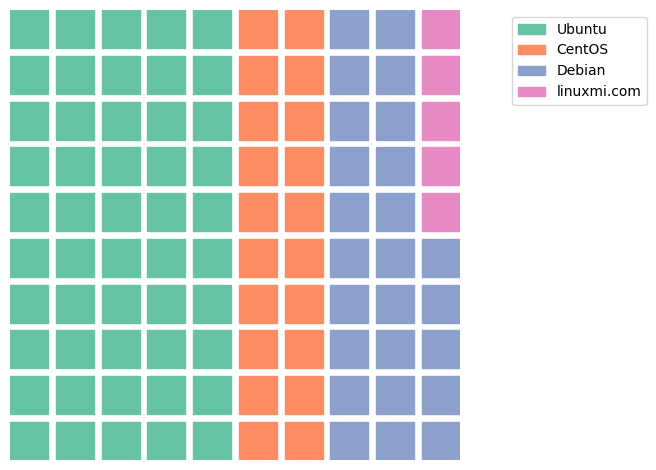

In [ ]:
# 导入必要的库
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Waffle示例
fig = plt.figure(FigureClass=Waffle,
                 rows=10,columns=10,
                 values={'Ubuntu': 50,
                         'CentOS': 20,
                         'Debian': 25,
                         'linuxmi.com': 5},
                 legend={'loc': 'upper left',
                         'bbox_to_anchor': (1.1, 1)}
                 )
plt.show()


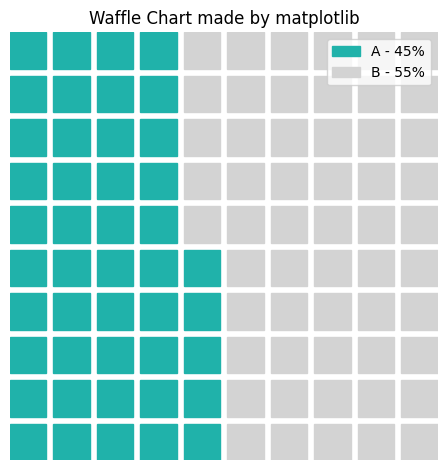

In [ ]:
# 设置颜色 - colors
import matplotlib.pyplot as plt
from pywaffle import Waffle
fig = plt.figure(FigureClass=Waffle,
    rows=10, #columns=10, #行或列都可以省略
    values=[45,55], colors=['#20B2AA', '#D3D3D3'],
    title={ 'label': 'Waffle Chart made by matplotlib'},
    legend={'loc': 'upper right','labels': ['A - 45%','B - 55%']})
plt.show()


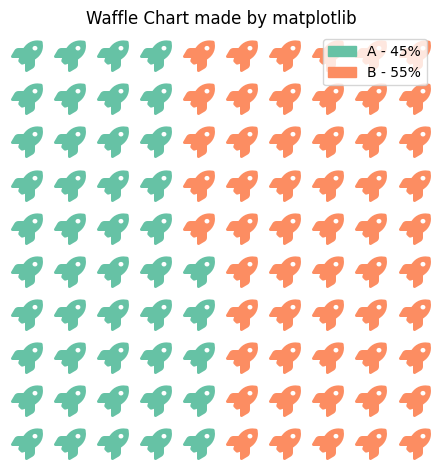

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
fig = plt.figure(FigureClass=Waffle,
    rows=10, values=[45, 55],
    title={'label': 'Waffle Chart made by matplotlib'},
    legend={'loc': 'upper right', 'labels': ['A - 45%', 'B - 55%']},
    icons='rocket'  # basketball-ball,car
)
plt.show()


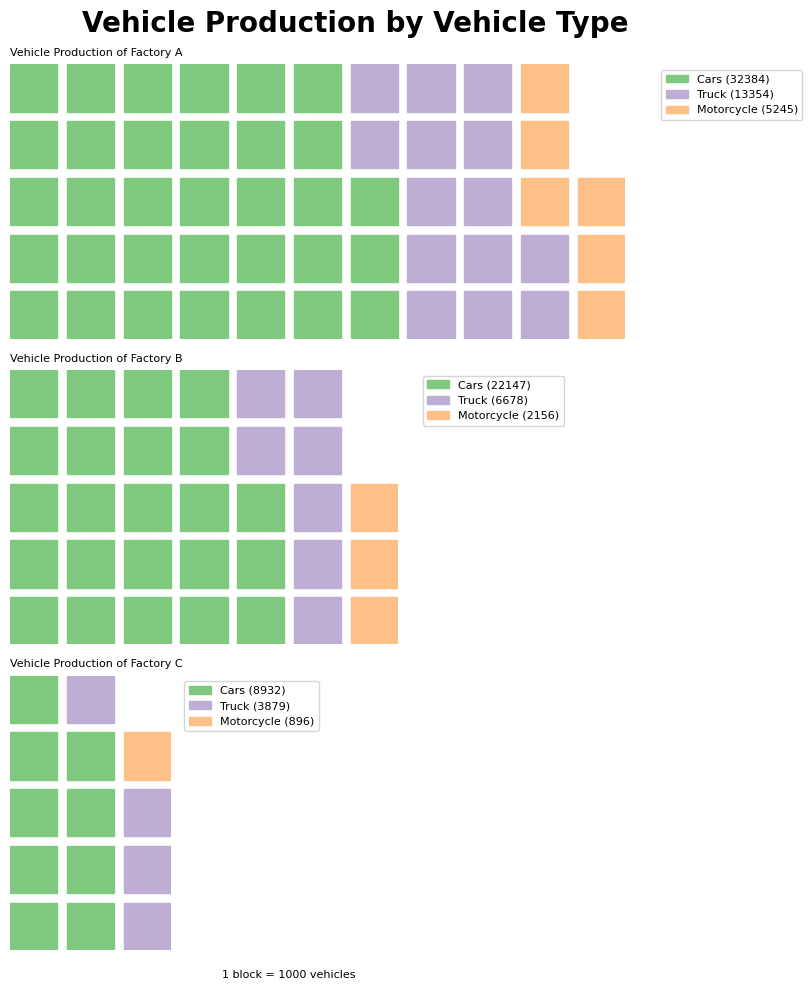

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

data = pd.DataFrame(
    { 'labels': ['Cars', 'Truck', 'Motorcycle'],
      'Factory A': [32384, 13354, 5245],
      'Factory B': [22147, 6678, 2156],
      'Factory C': [8932, 3879, 896],
    }).set_index('labels')

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'values': data['Factory A'] / 1000,
            'labels': [f"{k} ({v})" for k, v in data['Factory A'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Vehicle Production of Factory A', 'loc': 'left', 'fontsize': 8}
        },
        312: {
            'values': data['Factory B'] / 1000,
            'labels': [f"{k} ({v})" for k, v in data['Factory B'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Vehicle Production of Factory B', 'loc': 'left', 'fontsize': 8}
        },
        313: {
            'values': data['Factory C'] / 1000,
            'labels': [f"{k} ({v})" for k, v in data['Factory C'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Vehicle Production of Factory C', 'loc': 'left', 'fontsize': 8}
        }
    },
    rows=5,
    cmap_name="Accent",
    rounding_rule='ceil',
    figsize=(12, 10)
)
fig.set_facecolor('w')
fig.suptitle('Vehicle Production by Vehicle Type', fontsize=20, x=0.3, fontweight='bold')
fig.supxlabel('1 block = 1000 vehicles', x=0.3, fontsize=8, ha='right')

plt.show()


# web-scraping

In [ ]:
import pandas as pd

# URL of the online dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# Use Pandas to read the online dataset into a DataFrame
df = pd.read_csv(url, header=None, na_values='?', names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                                                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])

# Print the first few rows of the DataFrame
print(df.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [ ]:
import requests
import pandas as pd

url = "https://gbfs.citibikenyc.com/gbfs/en/station_information.json"
response = requests.get(url)
data = response.json()
stations = pd.DataFrame(data['data']['stations'])
stations

stations = stations[['station_id', 'name', 'lat', 'lon']]
stations

#csv = stations.to_csv('citi_bike_stations.csv', index=False)
#csv


station_id                     name  \
0                      1828967979464708718    87 St & Roosevelt Ave   
1                      1835246937517543544           24 Ave & 92 St   
2                      1815967807827104584     E 46 St & Snyder Ave   
3                      1838071008881986168          37 Ave & 113 St   
4                      1835246658344669972    96 St & Northern Blvd   
...                                    ...                      ...   
4079  581211b2-4e42-48f2-8a8f-5f968cb1c5df     Bergen Ave & Sip Ave   
4080  66dddd28-0aca-11e7-82f6-3863bb44ef7c  Communipaw & Berry Lane   
4081  9d344652-976b-4c2d-bede-2ef19b0fbf13          6 St & Grand St   
4082  5aa81a37-ea1d-4bf6-ab40-4751c6b4fb08            Fairmount Ave   
4083  bd6f422b-d7ae-4d7e-9261-653fdd8e6888     12 St & Sinatra Dr N   

            lat        lon  
0     40.748250 -73.879360  
1     40.765890 -73.877890  
2     40.650010 -73.934150  
3     40.754750 -73.854900  
4     40.757120 -73.872200  
...         ...        ...  
4079  40.731009 -74.064437  
4080  40.714358 -74.066611  
4081  40.744398 -74.034501  
4082  40.725726 -74.071959  
4083  40.750604 -74.024020  

[4084 rows x 4 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(stations, *['lat'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(stations, *['lon'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(stations, *['lat'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(stations, *['lon'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(stations, *[[['lat', 'lon']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(stations, *['lat'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(stations, *['lon'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(stations, *['lat'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(stations, *['lon'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(stations, *[[['lat', 'lon']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['lat'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['lon'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['lat'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['lon'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['index', 'lat'], ['lat', 'lon']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['index', 'lat', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['index', 'lon', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_11, *['lat'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['lon'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['lat'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_15, *['lon'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_16, *[[['index', 'lat'], ['lat', 'lon']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['index', 'lat', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_18, *['index', 'lon', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_19, *['index', 'count()', None], **{})
chart

# xgboost

Accuracy: 0.956140350877193
AUC: 0.9931215198165739


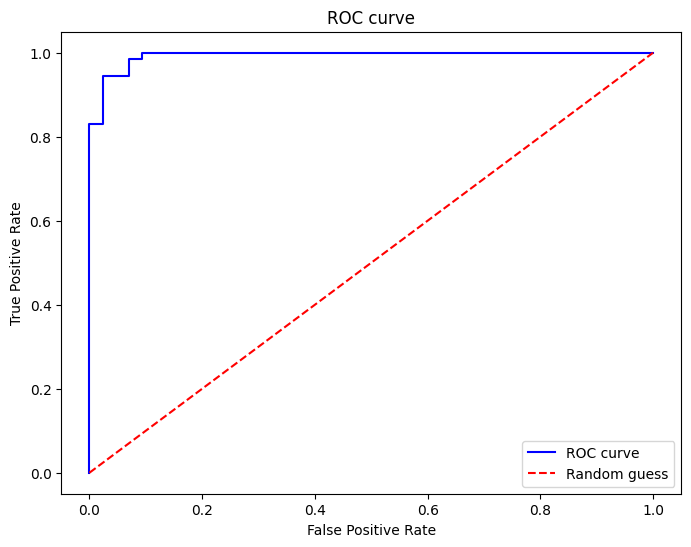

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
param = {
    'max_depth': 3,  # maximum depth of each tree
    'eta': 0.3,  # learning rate
    'objective': 'binary:logistic',  # binary classification
    'eval_metric': 'auc'  # evaluation metric
}

# Train the XGBoost model
num_round = 10  # number of boosting rounds
model = xgb.train(param, dtrain, num_round)

# Make predictions on the testing set
y_pred = model.predict(dtest)

# Round the probabilities to get binary predictions
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred_binary)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("AUC:", auc)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()
